# Fundamentals of Data Analysis Project 2019 
## Roisin Fallon


## Tips Dataset 

<p align ="center"><img src="images/tip.jpg" alt="Tip at Restaurant " width="300" height="300" title="Tip"/></p>


### Table of Contents

1. [ Python Libraries ](#lib)
2. [ Tips dataset csv ](#tip)
3. [ Dataset Summary](#sum)
    * [Shape](#shape)
    * [ Info ](#info)
    * [ Columns ](#columns)
    * [ Data Types ](#dtypes)
    * [ Null Values ](#isnull)
    * [ Head of tips dataset](#head)
    * [ Tail of tips dataset ](#tail)
    * [ Unique Species ](#unique) 
    * [ Statistical Summary](#stats)
    * [ Create new column ](#new)
    * [ Class Distribution](#class)
4. [ Create new column ](#new)
5. [Visualize the dataset](#visualize)
    * [Countplot](#count)
    * [Barplot](#box)
    * [Pointplot](#point)
    * [Boxplot](#box)
    * [Violinplot](#violin)
    * [Striplot ](#strip)
    * [Swarmplot ](#swarm)
    * [Distplot ](#dist)
6. [Linear regression of total bill and tip](#linear)
7. [ Relationship between the other variables](#var)
    * [Total Bill, Tip and Time ](#time)
    * [Total Bill, Tip and Day ](#day)
    * [Total Bill, Tip, Time and Day ](#dt)
    * [Total Bill, Tip and Smoker ](#smoker)
    * [Total Bill, Tip and Gender](#gender)
    * [Total Bill, Tip, Smoker and Gender ](#sg)
10. [Conclusion](#con)
11. [Bibliography](#bib)

<a name=lib></a>
## Python Libraries

<b><i> Anaconda on your device (version 3.7 +) </i></b>

<a href=https://www.anaconda.com/distribution/> Download here </a>

This contains porting for the library listed below. By downloading Anaconda it removes the need to import numerous libraries seperately.

<b><i> Pandas </i></b>

<a href=https://pandas.pydata.org/getpandas.html> Download here </a>

This is a Python package designed to strucure information in rows and columns. It is known for quick and easy data manipulation, aggregation, and visualization. Python takes in data via a CSV, TSV file or SQL database and creates a Python object called a data frame. Brief Introducton of Panda outlined <a href=https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673> here. </a>

<b><i> NumPy </i></b>

<a href=http://www.numpy.org/> Download here </a>

This is a numerical library, performs many mathematical operations and handles i. Brief introductiion outlined <a href=https://towardsdatascience.com/a-quick-introduction-to-the-numpy-library-6f61b7dee4db> here. </a>

<b><i> Matplotlib </i></b>

<a href=https://matplotlib.org/downloads.htmll> Download here </a>

This is a plotting library, makes 2D plots that helps in the visualisation of figures using one or multiple numeric variables. It can generate histograms, pie charts, time series, boxplot, violin plot, stack plot, stem plots and scatter plots. It can be used in Python scripts, Jupyter notebook, and web application servers. Brief Introduction outlined <a href=https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70> here. </a>

<b><i> Seaborn </i></b>

This a satistical plotting library which has more advanced data visualisation than matplotlib (both are plotting libraries). Seaborn produces nice visualizations eliminating much of the work necessary for producing similar visualizations with matplotlib. It gives a high-level interface to draw statistical graphs, making it easier to generate more complex visualizations. Brief introduction outlined <a href=https://towardsdatascience.com/data-visualization-using-seaborn-fc24db95a850> here. </a>

<b><i> Scikit-learn </i></b>

Simple and efficient tool that can be used for data miming or data analysis. It's library contains a lot of effiecient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction. It comes as part of the anaconda package Brief introduction outlined <a href=https://scikit-learn.org/stable/install.html> here. </a>

In [24]:
# Import the libraries

import numpy as np
import pandas as pd


# Visualisation library

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# current version of seaborn creates warnings this will remove them
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
# To plot the graph embedded in the notebook
%matplotlib inline
import scipy.stats as stats

# inport statsmodels.
import statsmodels.api as sm
import statsmodels.stats.weightstats as ws
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import sklearn.neighbors as nei
import sklearn.model_selection as mod

# Standardise the size of the plots throughout this project
plt.rcParams['figure.figsize'] = (25, 17)
sns.set_style("whitegrid")
sns.set_style('ticks')

<a name="tip"></a>
## Tips dataset csv

 <a href=https://github.com/pandas-dev/pandas/blob/master/doc/data/tips.csv> Download here </a>

In [25]:
# Read the csv file contents using seaborne 
tips = sns.load_dataset("tips")

# This statement below has been coded out but represents printing out the csv datset
# print(tips)                         

<a name="sum"></a>
## Descriptive Dataset Summary

### Dataset Summary

<a name="shape"></a>
### A. Shape 

Confirms the shape of the tips dataset in terms of the number of rows and columns

In [26]:
# Check how many rows and columns there are in the tips dataset.\n",

print("\n Shape of tips dataset, {0} rows and {1} columns".format(tips.shape[0], tips.shape[1]))

# print("The shape of the dataset is: ", tips.shape)


 Shape of tips dataset, 244 rows and 7 columns


<a name="info"></a>
### B. Info 
 
Provides information on the tips dataset including names of columns, total number of rows and columns, data type of each column, range index and memory usage.

In [27]:
# Determine data columns data type:

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


<a name=columns></a>
### C. Columns

In [28]:
# A more verbose way to extract this information would be to run the following code
print("Tips dataset columns: \n", tips.columns)      # This will give the names of the columns

Tips dataset columns: 
 Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


<a name="dtypes"></a>
### D. Data Types

From the code below we can see that gender, smoker, day and time are categorical data whereas total_bill, tip, and size are numerical data.

In [29]:
print("Types of data: ", tips.dtypes)            # This will state the data types"

Types of data:  total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


From the code above we can see that gender, smoker, day and time are categorical data whereas total_bill, tip, and size are numerical data.

|Column Names | Description |
|-------------|-------------|
|total_bill   | financial amount of meal in U.S. dollars |
|tip          | financial amount of the meal's tip in U.S. dollars |
|sex          | gender of person paying for the meal (0=male, 1=female |
|smoker       | boolean to represent if customer smokes (0=No, 1=Yes) |
|day          | day of week i.e. 3=Thur, 4=Fri, 5=Sat, 6=Sun |
|time         | meal name (0=Lunch and 1= Dinner) |
|size         | count of people eating meal (party size) |

<i><center> (Jain, 2018)</center> </i>


<a name="isnull"></a>
### E. Null Values

Determine if there is any null values in the tips dataset. This confirms there is no null values in the tips dataset.

In [30]:
# Determine if there is any null values in the dataset
# Colorize a single line and then reset

print("\n Missing values in the dataset: \n") 
tips.isnull().any()


 Missing values in the dataset: 



total_bill    False
tip           False
sex           False
smoker        False
day           False
time          False
size          False
dtype: bool

<a name="head"></a>
### F. Head of the tips dataset

The head funtion displays the first 4 rows of the dataframe. A different number of rows can be displayed, if we change the input between the parentheses (). Default is 5 rows i.e. if no value is passed trough the paranthese then 5 rows will be printed.

In [31]:
# Returns the firt 4 rows of the dataset.
# List the top 4 rows of the dataset. This allows us to see the structure of the dataset with respects the columns

tips.head(4)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


<a name="tail"></a>
### G. Tail of the dataset

The tail function displays the last 4 rows of the dataframe. Default is 5 rows i.e. if no value is passed trough the paranthese then 5 rows will be printed.

In [32]:
# List the last 4 rows of the dataset. 
# This allows us to see the structure of the dataset with respects the columns

tips.tail(4)

,total_bill,tip,sex,smoker,day,time,size
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


<a name="unique" ></a>
### H. Unique values

For the categorical variables in the dataset the unique function will determine the possible outcomes for each of the variables.

In [33]:
print(" \n Unique values for days in the tips dataset: \n ", tips['day'].unique(), "\n\n")

print("Unique values for time in the tips dataset: \n ", tips['time'].unique(),"\n\n")

print("Unique values for size of the party in the tips dataset: \n ", tips['size'].unique(),"\n\n")

print("Unique values for genders in the tips dataset: \n ", tips['sex'].unique(),"\n\n")

print("Unique values for smokers in the dataset: \n ", tips['smoker'].unique(),"\n\n")

 
 Unique values for days in the tips dataset: 
  [Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri] 


Unique values for time in the tips dataset: 
  [Dinner, Lunch]
Categories (2, object): [Dinner, Lunch] 


Unique values for size of the party in the tips dataset: 
  [2 3 4 1 6 5] 


Unique values for genders in the tips dataset: 
  [Female, Male]
Categories (2, object): [Female, Male] 


Unique values for smokers in the dataset: 
  [No, Yes]
Categories (2, object): [No, Yes] 




<a name="stats"></a>
### Statistical Analysis

In [34]:
# https://buildmedia.readthedocs.org/media/pdf/data-and-design/latest/data-and-design.pdf
# The following code performs several statistical calculations on the dataset.

# Minimum values in the dataset:
minimum_tip = min(tips["tip"])                                     # Minimum/ Lowest tip price                      
minimum_total_bill = min(tips["total_bill"])                        # Minimum/ Lowest total bill price

# Maximum values in the dataset:
maximum_tip = max(tips["tip"])                                      # Max tip price
maximum_total_bill = max(tips["total_bill"])                        # Max total_bill price

# Mean of the dataset
mean_tip = tips["tip"].mean()                                           # Mean/Average tip 
mean_total_bill =  tips["total_bill"].mean()                            # Mean/Average of the total_bill             

# Median of the data - 50% i.e. the halfway marker of the dataset
median_tip = tips["tip"].median()                                       # Median tip 
median_total_bill = tips["total_bill"].median()                         # Median of the total_bill

# Mode values of the dataset:
mode_tip = tips["tip"].mode()                                         # Mode of the tips column
mode_total_bill = tips["total_bill"].mode()

# Standard deviation of te data:
std_tip = tips["tip"].std()
std_total_bill = tips["total_bill"].std()


# Total the amount of tips
tip_total = tips.tip.sum()
bill_total = tips.total_bill.sum()

# Show the calculated statistics * 1000 as the values in the boston dataaset are in the '000s'
print("Statistics for the Boston Housing dataset:\n")

print("Minimum Tip                         : ${:,.2f}".format(minimum_tip))                
print("Minimum Total Bill                  : ${:,.2f}".format(minimum_total_bill),"\n")     
print("Maximum Tip                         : ${:,.2f}".format(maximum_tip))              
print("Maximum Total Bill                  : ${:,.2f}".format(maximum_total_bill),"\n")  
print("Mean Tip                            : ${:,.2f}".format(mean_tip))
print("Mean Total Bill                     : ${:,.2f}".format(mean_total_bill),"\n")     
print("Median Tip                          : ${:,.2f}".format(median_tip))
print("Median Total Bill                   : ${:,.2f}".format(median_total_bill),"\n") 
print("Mode Tip                            : ${:,.2f}".format(mode_tip[0]))
print("Mode Total Bill                     : ${:,.2f}".format(mode_total_bill[0]),"\n")
print("Standard deviation of Tip           : ${:,.2f}".format(std_tip))
print("Standard deviation of Total Bill    : ${:,.2f}".format(std_total_bill),"\n")
print ("Total tips                          : ${:.2f}".format(tip_total))
print("Total bill is                       : ${:.2f}".format(bill_total),"\n")

Statistics for the Boston Housing dataset:

Minimum Tip                         : $1.00
Minimum Total Bill                  : $3.07 

Maximum Tip                         : $10.00
Maximum Total Bill                  : $50.81 

Mean Tip                            : $3.00
Mean Total Bill                     : $19.79 

Median Tip                          : $2.90
Median Total Bill                   : $17.80 

Mode Tip                            : $2.00
Mode Total Bill                     : $13.42 

Standard deviation of Tip           : $1.38
Standard deviation of Total Bill    : $8.90 

Total tips                          : $731.58
Total bill is                       : $4827.77 



<b><i> To summarise the data for tips overall dataset. It is a much less verbose method than the code in the previous cell. </i></b>

In [35]:
# Gives statistical summary of the overall tips dataset
round(tips.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.79,8.90,3.07,13.35,17.8,24.13,50.81
tip,244.0,3.00,1.38,1.00,2.00,2.9,3.56,10.00
size,244.0,2.57,0.95,1.00,2.00,2.0,3.00,6.00


<a name="new"></a>
## Create new columns:

* <b><i> To get tip as a percent of total bill</i></b>
* <b><i>To get the total amount paid (total_bill and tip)</i></b>

In [36]:
# Creates new column that represents the tip percentage of the total_bill
tips['percent'] = 100 * (tips['tip'] / tips['total_bill'])

# Creates new column that represents the tip amount paid by customer
tips['total_amount'] = tips['tip'] + tips['total_bill'] 

<a name="class"></a>
### Class Distribution

Class distribution - this can give us a better understanding of the distribution of data in terms of gender, smoker, time and day. Using the group by function or the pivot function can allow us to get a closer look and allow us to answer questions based on the dataset.

### Pivot Tables:

* A pivot table is a data summmarization tool wich reorganises selected rows and coluns of data in a datavase table to get a desired report. It does not change te contents of the database, it simply pivots (turns) the datawich allows you to view it from different perspectives. Throughout this project I have used pivot tables which helped me explore the numerical data.

In [37]:
# The normal aggregate function is the mean but other functions can be applied.

pd.pivot_table(tips, values='percent', index='sex', columns='smoker', aggfunc=len, margins=True, margins_name='Total', fill_value=0)

smoker,Yes,No,Total
sex,,,
Male,60,97,157.0
Female,33,54,87.0
Total,93,151,244.0


Instead of using  pivot tables we could use a groupby function as seen below. In the first two instances we groupby one variable. It is a more verbose method  grouping by one variable at a time.

In [38]:
# Determines the distribution of males and females
gender = tips.groupby("sex").size()
print("\n Tips dataset grouped by sex only: \n", gender)


 Tips dataset grouped by sex only: 
 sex
Male      157
Female     87
dtype: int64


In [39]:
# Determines the distribution of smokers and non-smokers in the dataset
print("\n Tips dataset grouped by smoker only: \n")
tips.groupby(by='smoker').size()


 Tips dataset grouped by smoker only: 



smoker
Yes     93
No     151
dtype: int64

It is possible to groupby more than variable at a tie which is seen in the code below. As you can see it produces the same result as the previous two codes combined. 

In [40]:
# Deterines te distribution of male and females that smoke and don't smoke
# It combines te above two commands into one line of code
print("\n Tips dataset grouped by sex and smoker: \n")
tips.groupby(["sex", "smoker"]).size()


 Tips dataset grouped by sex and smoker: 



sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
dtype: int64

<a name="visual"></a>
## Visualisation of Data

### Categorical estimate plots:

This shows an estimate of central tendency of the values. 


* Countplot
* Barplot
* Pointplot

<a name="count"></a>
### Countplot

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. A countplot basically counts the categories and returns a count of their occurences. 

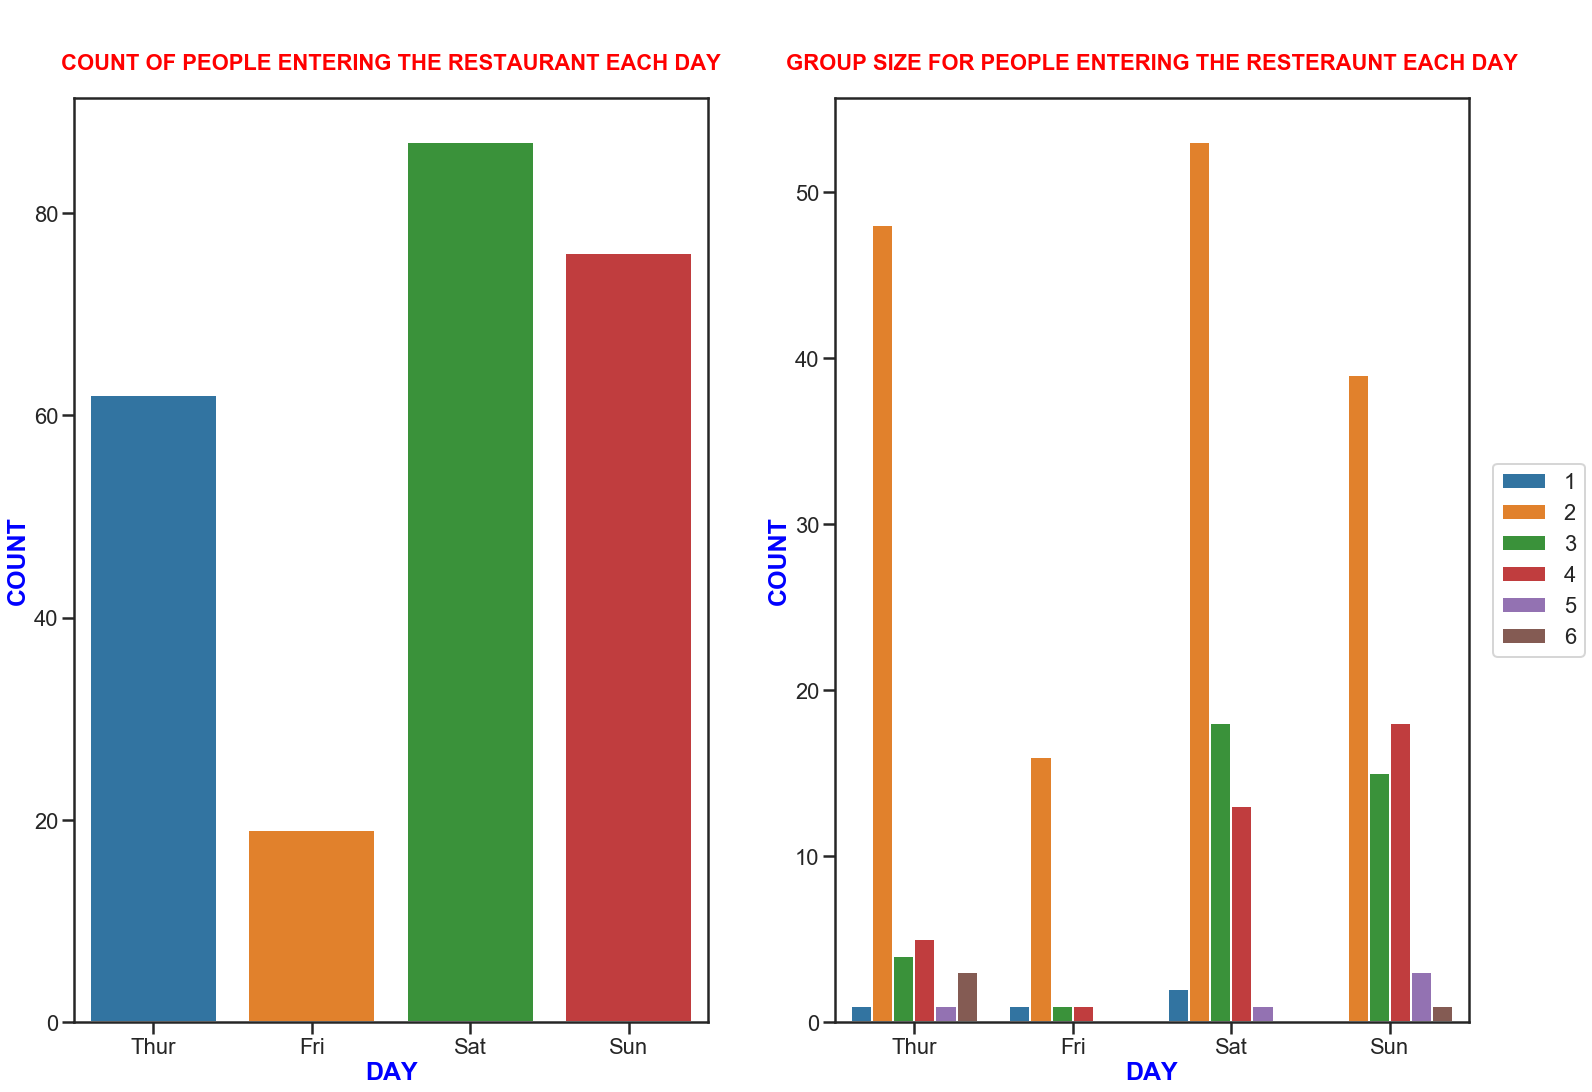

In [43]:

plt.subplot(1, 2, 1) 
sns.countplot(x='day', data=tips)                              
plt.xlabel("DAY", fontweight="bold", fontsize="25", color="b")                                 
plt.ylabel("COUNT", fontweight="bold", fontsize="25", color="b") 
plt.title("\n\n COUNT OF PEOPLE ENTERING THE RESTAURANT EACH DAY \n", fontweight="bold", fontsize="22", color="r")  

plt.subplot(1, 2, 2)
sns.countplot(x='day', hue='size' ,data=tips)
# plot data and properties
# Format of the countplot
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), ncol=1)                               
plt.xlabel("DAY", fontweight="bold", fontsize="25", color="b")                                 
plt.ylabel("COUNT", fontweight="bold", fontsize="25", color="b") 
plt.title("\n\n GROUP SIZE FOR PEOPLE ENTERING THE RESTERAUNT EACH DAY \n", fontweight="bold", fontsize="22", color="r")  
plt.show()

In [44]:
# Numerical representation of the above graph
pd.pivot_table(tips, 'percent', index=['day'], columns='size', aggfunc=len,  margins=True, margins_name='Total', fill_value=0)

size,1,2,3,4,5,6,Total
day,,,,,,,
Thur,1,48,4,5,1,3,62.0
Fri,1,16,1,1,0,0,19.0
Sat,2,53,18,13,1,0,87.0
Sun,0,39,15,18,3,1,76.0
Total,4,156,38,37,5,4,244.0


<i> <b>Countplot on the right: </b> Number of people entering the restaurnt is significantly lower on Friday than on the other days. There are triple the number of customers on Thursday when compared to Friday. As expected the highest numbers are seen on Saturday and Sunday, Saturday is the highest and has 4 times the number that is on the Friday. 
    
<b>Countplot on the left: </b> Breakdown of the group sizes for the people entering the restaurant on each of the days.  It is clear that party size  of 2 was significantly the most popular on each day. It can also be observed that the larger group sizes were seen at the weekend. 

* Group size of 1, 5 and 6: These group sizes represnt no more than 5% over the course of any of the days as a result it is evident from above that these are the smallest group sizes that enter the restaurant. 
* Group size of 2:  It is evident that the most popular group size is 2 over all of the days. Group Size of 2 entering into the resteraunt on Thursday and Friday at roughly 80% of the total people entering the restaurant. Saturday represents 61% and Sunday represents 51% of the group sizes entering the restaurnant on those days.
* Group size of 3 and 4: Thursday 7 - 8% respectively of the total group size. Friday is 5% for both. Saturday represents 21% and 15% respectively. Sunday represents 20% -24% . 
   
   </i>

<a name="bar"></a>
### Barplot

Barplot graph is used to plot categorical data in the form of rectangular bars where heights of bars are proportional to the numeric value represented by the corresponding categorical columns. [12]. The error bars represent a 95% confidence interval of the mean. 

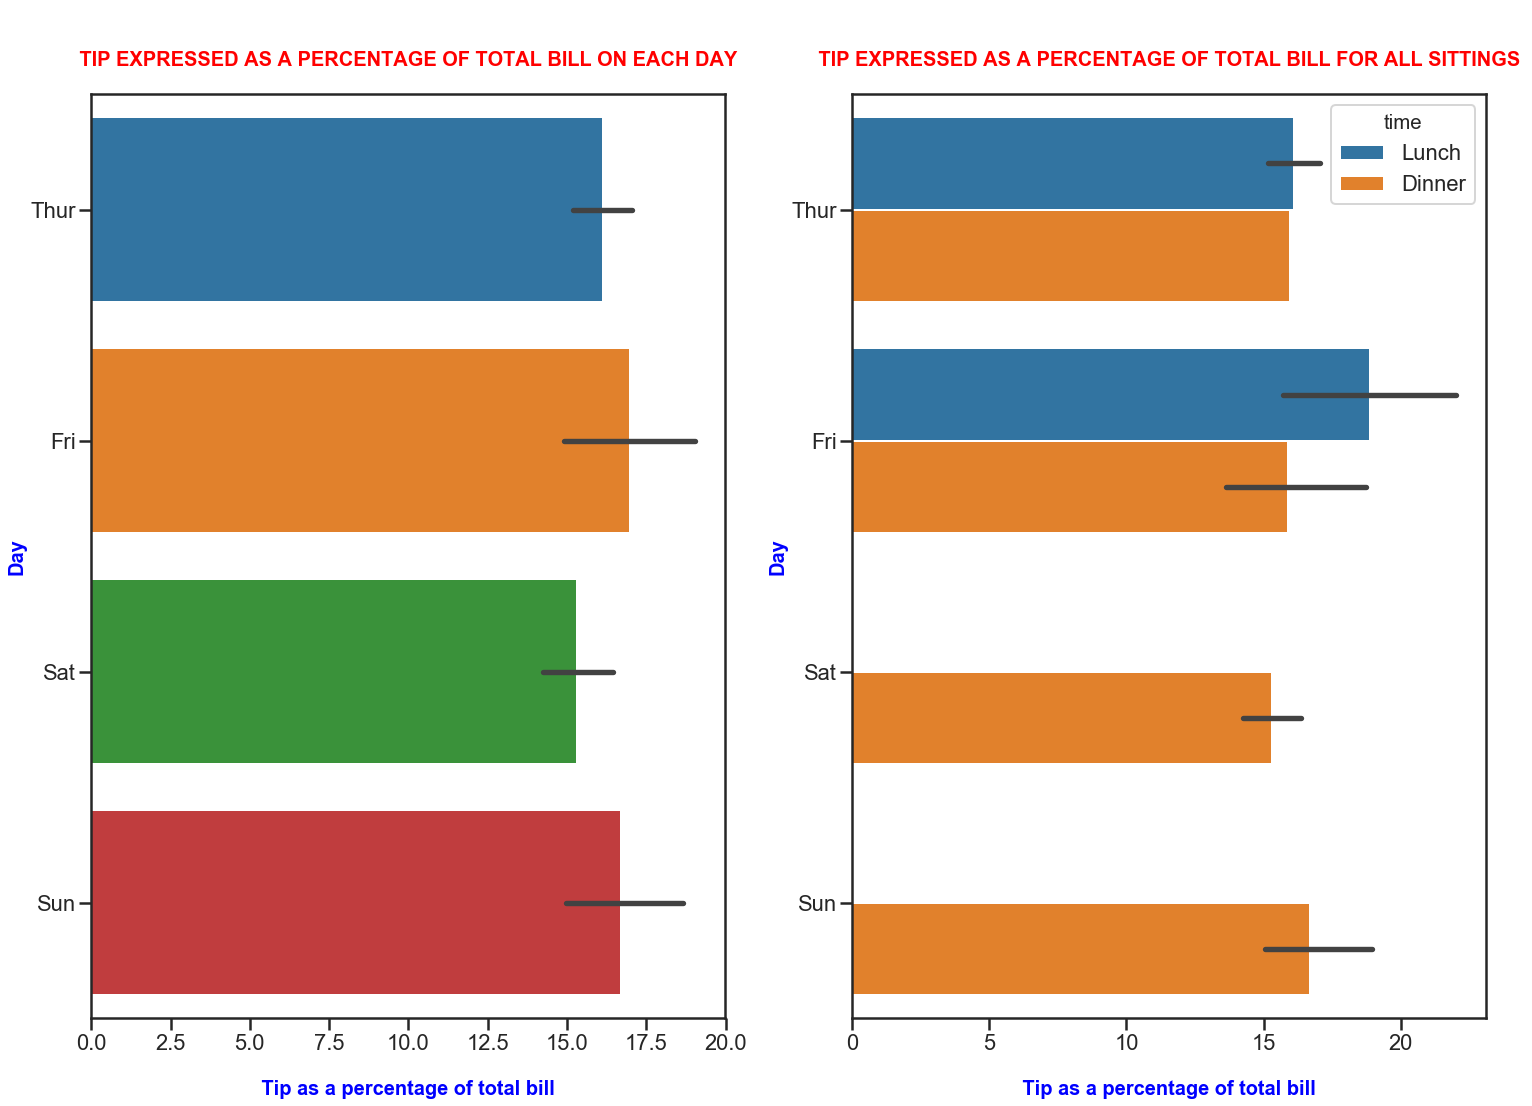

In [45]:
# Barplot which represents the tip as a percentage of the total bill
plt.subplot(1, 2, 1) 
sns.barplot(x="percent", y="day", data = tips)
plt.ylabel("Day", fontweight="bold", fontsize="20", color="b")                                 
plt.xlabel("\n Tip as a percentage of total bill ", fontweight="bold", fontsize="20", color="b") 
plt.title("\n\n TIP EXPRESSED AS A PERCENTAGE OF TOTAL BILL ON EACH DAY \n", fontweight="bold", fontsize="20", color="r") 

plt.subplot(1, 2, 2)
sns.barplot(x="percent", y="day", hue="time", data = tips)
plt.ylabel("Day", fontweight="bold", fontsize="20", color="b")                                 
plt.xlabel("\n Tip as a percentage of total bill ", fontweight="bold", fontsize="20", color="b") 
plt.title("\n\n TIP EXPRESSED AS A PERCENTAGE OF TOTAL BILL FOR ALL SITTINGS \n", fontweight="bold", fontsize="20", color="r")
plt.show()

In [46]:
# Numerical representation of the graph to the right
round(pd.pivot_table(tips, index=['day','time'], values='percent', aggfunc='mean'))

percent
day  time           
Thur Lunch      16.0
     Dinner     16.0
Fri  Lunch      19.0
     Dinner     16.0
Sat  Dinner     15.0
Sun  Dinner     17.0

<i><b> Barplot on the left: </b>  There are multiple observations for each value in the day, the bars represent the average value of the tip percentage. The black lines drawn on the bars (above) represent the 95% confidence interval. From this we can see that 15% tip across all of the 4 days was the most common. 

<b> Barplot on the left: </b> This barplot further breaks down the tip percentage to determine if there is a difference in the % tipped at lunch or dinner. As expected there is no tip percentage for the lunch sitting on Saturday or Sunday as the restaurant is not open. The highest tip percent can be seen on Friday Lunch 19% and the lowest percent can be seen on Saturday Dinner. There is no significant difference in the percentage of the total bill tipped over the sittings in the restaurant i.e. they are all in or around the 16% range. </i>

<a name="point"></a>
### Pointplot

A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars [2]. Point plot shows the mean values and the error rate surrounding those mean values. 
These plots can be used for various data analysis and we can infer information regarding relations between different variables and can help to extract more significant features from the dataset.

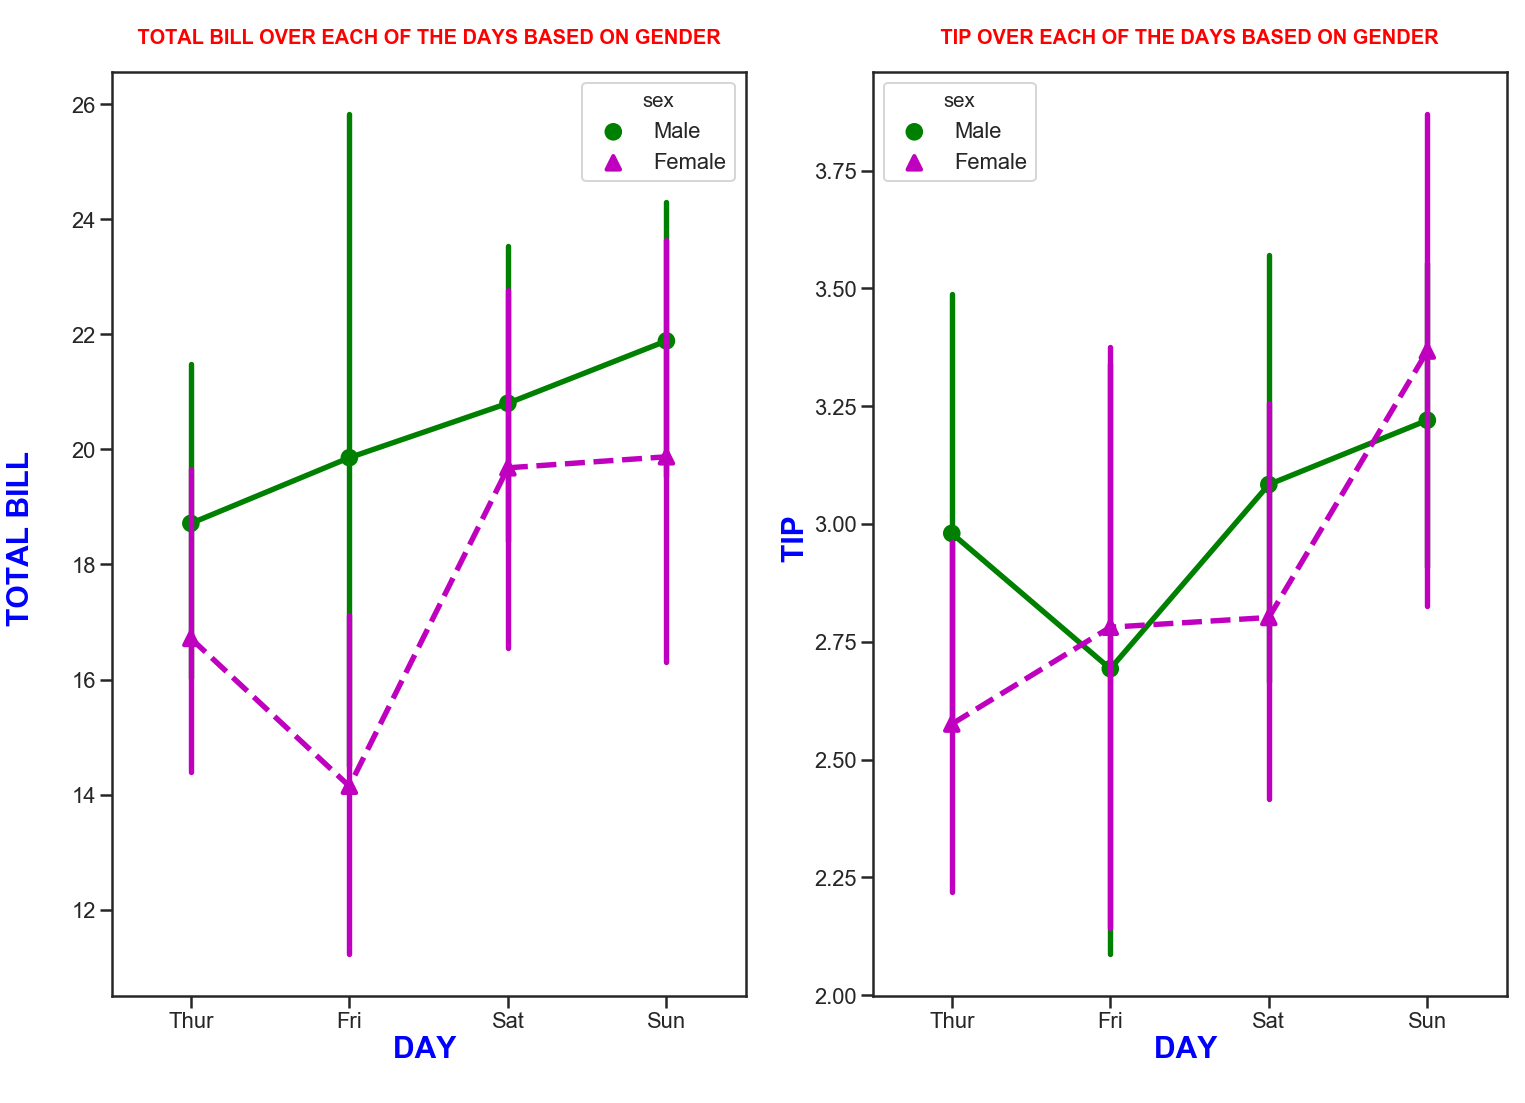

In [47]:

plt.subplot(1, 2, 1)
sns.pointplot(x="day", y="total_bill", hue="sex", palette={"Male": "g", "Female": "m"}, 
             markers=["o", "^"], linestyles=["-", "--"], data=tips)

plt.ylabel("TOTAL BILL \n", fontweight="bold", fontsize="30", color="b")                                 
plt.xlabel("DAY \n", fontweight="bold", fontsize="30", color="b") 
plt.title("\n TOTAL BILL OVER EACH OF THE DAYS BASED ON GENDER \n", fontweight="bold", fontsize="20", color="r")


plt.subplot(1, 2, 2)
sns.pointplot(x="day", y="tip", hue="sex", palette={"Male": "g", "Female": "m"}, 
             markers=["o", "^"], linestyles=["-", "--"], data=tips)

plt.ylabel("TIP ", fontweight="bold", fontsize="30", color="b")                                 
plt.xlabel("DAY \n", fontweight="bold", fontsize="30", color="b") 
plt.title("\n TIP OVER EACH OF THE DAYS BASED ON GENDER \n", fontweight="bold", fontsize="20", color="r")
plt.show()

<i><b> Pointplot on the left: </b> From this we can see the total bill changes over the course of the 4 days. The total bill for males increases from the day prior i.e. it is lowest on Thursday and highest on Sunday.  Total bill for females is lowest on Friday and jumps on Saturday and remains relatively constant on Sunday. The total bill for females is lower than that of the males for each of the days thus we could state that total bill is dependent on gender. 
    
    
<b> Pointplot on the right: </b>  The above barplot give a visualise representation of the tips that were given on each of the respective days. Male tipped higher at the weekend (Saturday and Sunday) with the lowest tip seen on Friday. Interestingly females tipped higher on Friday and Sunday than their male counterparts but tipped significantly lower on Thursday and Saturday. From this plot overall we would state that you would be more likely to be tipped highest on a Sunday irrespective of gender, and would be tipped lower on weekdays which would be gender dependent i.e. lower on Thursday for females and lower on Friday for males.</i>

<a name="dis"></a>
### Categorical distribution plots:

* Boxplot
* Violinplot

<a name="box"></a>
### Boxplot
Boxplot is a grapical representation to show the distribution of data based on the five number summary: 

<img align="right" src="https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/GUID-0E2C3730-C535-40CD-8152-80D794A996A7-web.png" width=250 title="Boxplot Attributes">

- Median – refers to the middle value in the iris dataset
- Lower quartile (Q1) - refers to the middle number between the smallest number and the median of the dataset
- Upper quartile (Q3)- refers to the middle number between the median and the highest value  of the dataset 
- Maximum - Q3  + 1.5*IQR
- Minimum  - Q3 – 1.5*IQR
 - Interquartile range (IQR) = Upper Quartile – Lower Quartile

<i> Boxplots are best when used in combination with another statistical graph method e.g. histogram to give a  more thorough analysis of the iris dataset. </i>

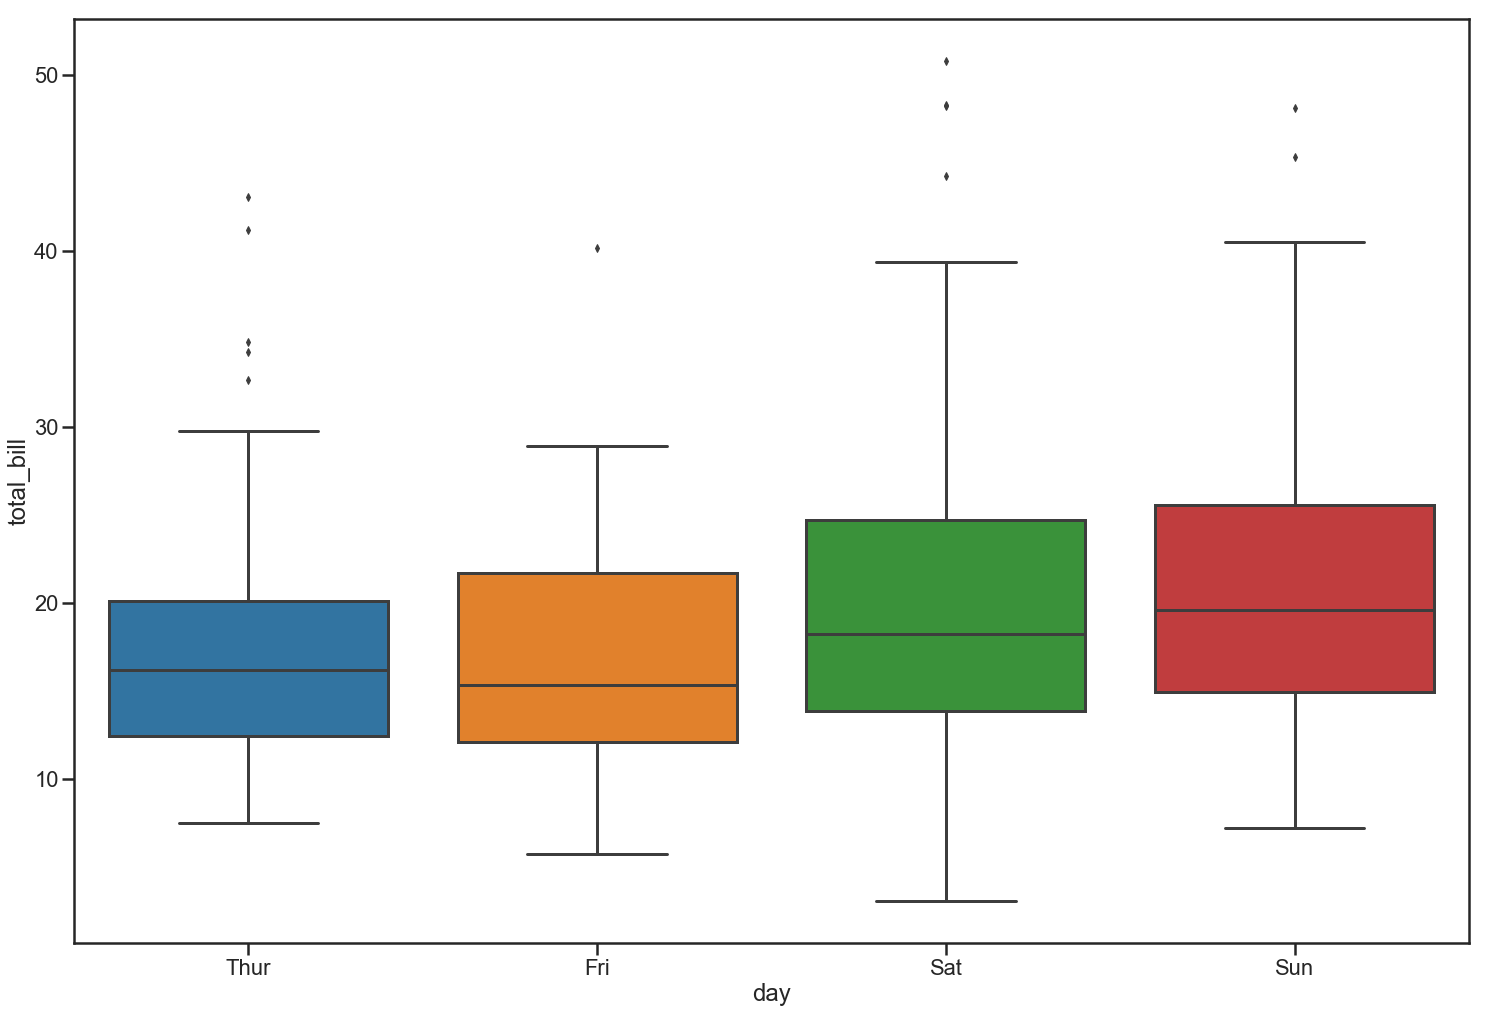

In [48]:
sns.boxplot(x = "day", y = "total_bill", data = tips)

<i> From this plot we could say that the total bill tends to e higher at the weekend that the weekdays

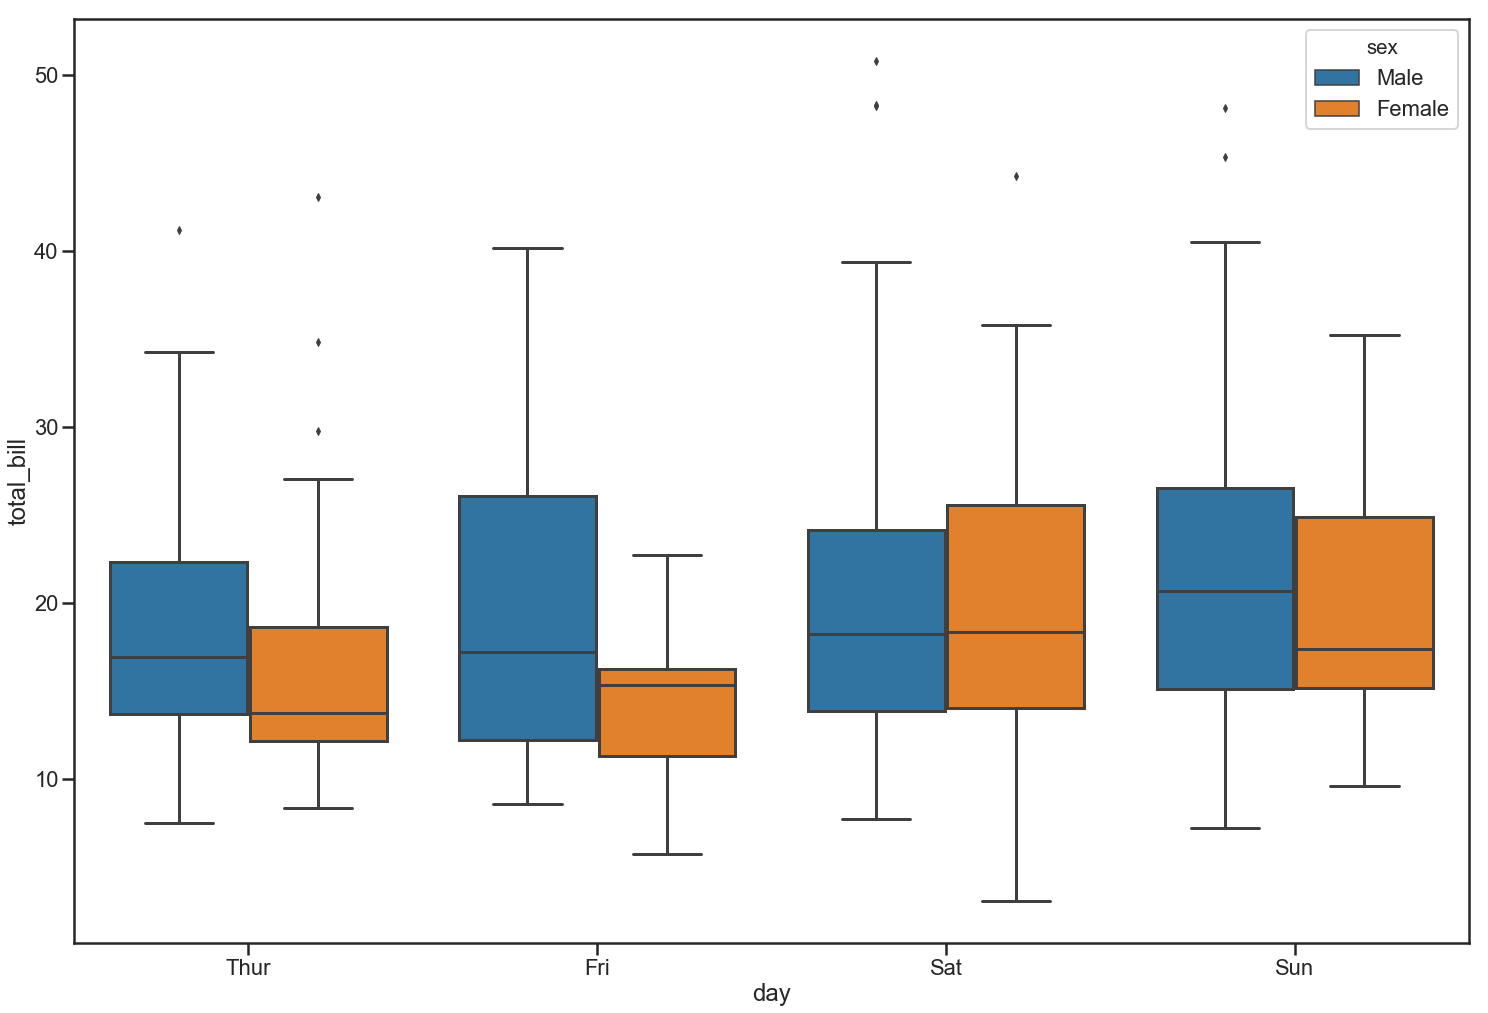

In [49]:
# https://data-and-design.readthedocs.io/en/latest/02-introPandas.html\

sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = tips)


<i> In this graph, we can see that the average amount of total_bill for females is always less than the males. So, we can say that total_bill amount is dependent on sex. On Friday we can see that female’s total_bill is much less than male’s total_bill. </i>

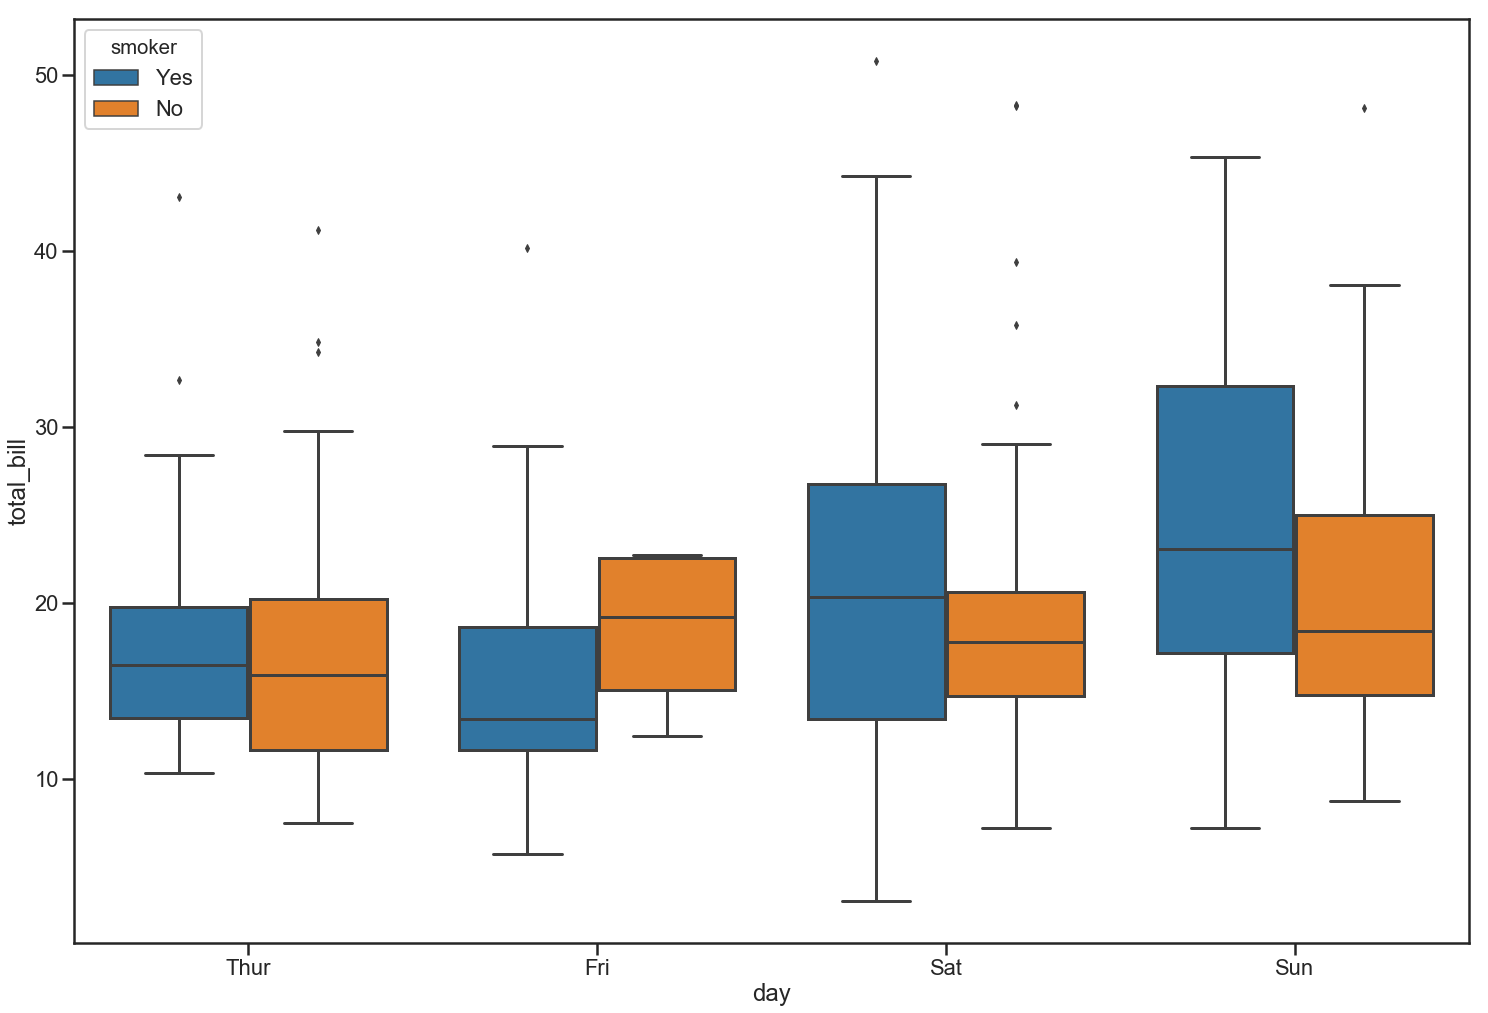

In [50]:
sns.boxplot(x = "day", y = "total_bill", hue = "smoker", data = tips)

<i> The gender divide across Thursday and Friday is very similar for smokers. The number of females that At the weekend Saturday and Sunday males smoke significantly more
than females. Males smoke the least on Friday (similar to females) but smoke the most on Thursday. The highest tip was actually given by a male smoker on Saturday night.</i>

<a name="violin"></a>
### Violinplot

* Violinplots provide more informationmore than a basic boxplot. 
* Boxplot shows summary statistics including the mean/median and interquartile ranges
* In addition to this violin plot shows the full distribution of the data.

      median
         tip
size        
1       1.42
2       2.50
3       3.29
4       3.76
5       5.00
6       5.00
Total   2.90


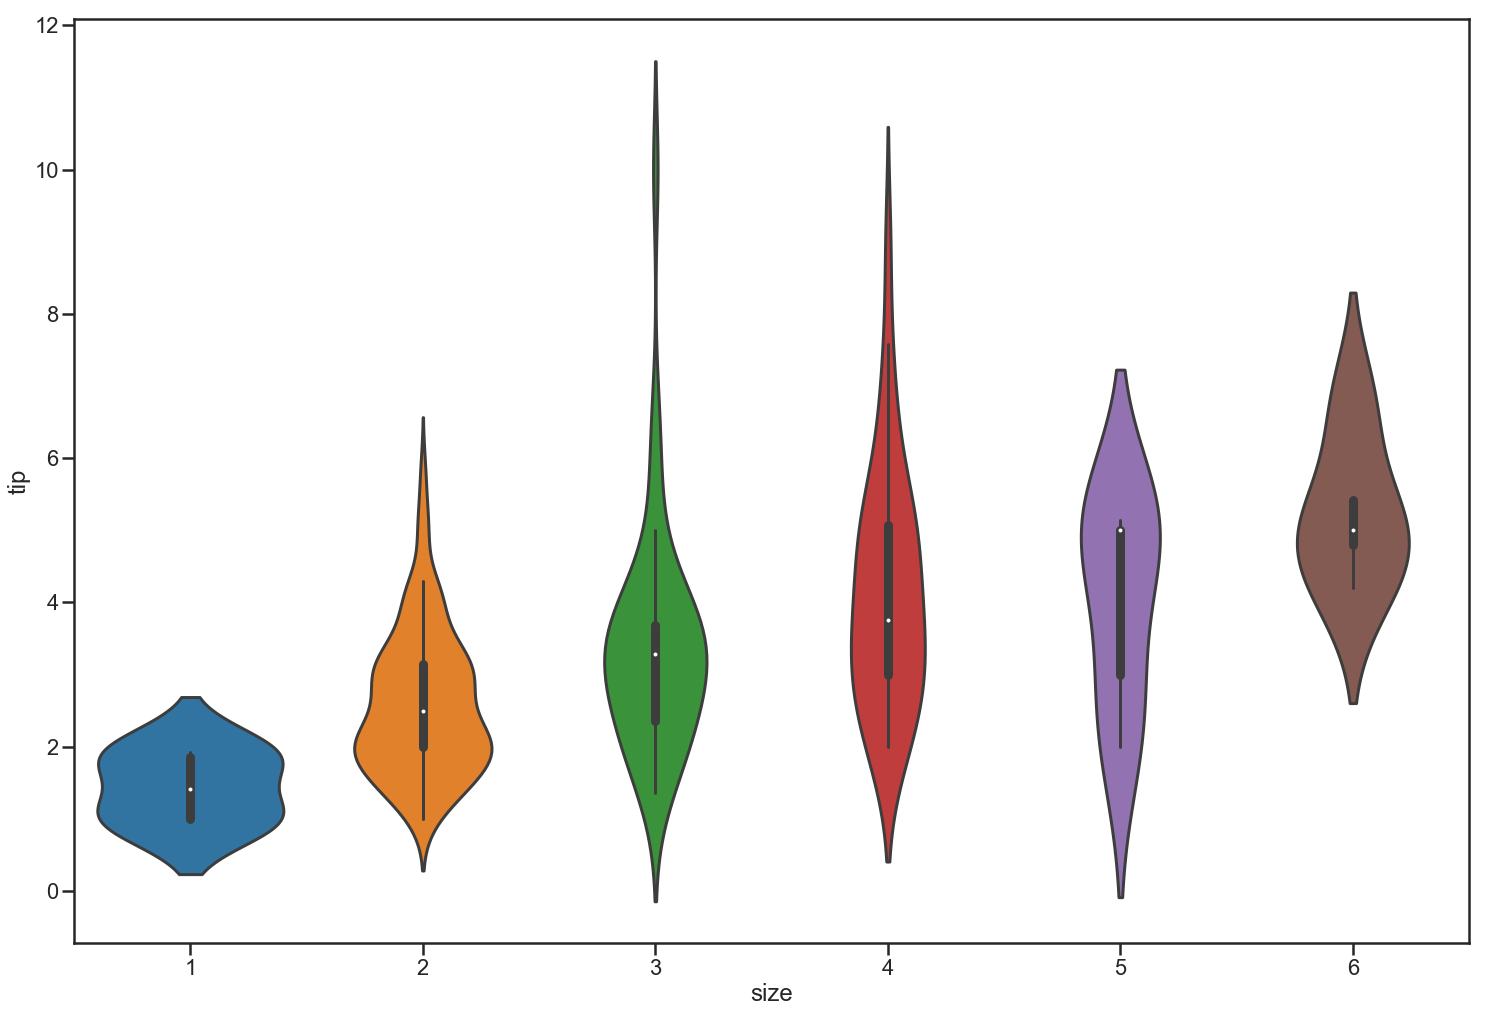

In [51]:

# Numerical representation of the mean of the percent for sex of the customer
print(round(pd.pivot_table(tips, index=['size'], values=['tip'], aggfunc=['median'], margins=True, margins_name='Total', fill_value=0),2))

sns.violinplot(x="size", y="tip", data=tips)

<i>From this violinplot we can see the relationship between group size and tip. Interestingly the median tip is lowest for group size of 1 at is ~ 1.5 dollars. The highest median tip was seen for group size of 5 and 6 they appear to be the same ~5 dollars. </i>

### Categorical scatterplots

* Stripplot
* Swarmplot

<a name="strip"></a>
### Stripplot

* Used to draw a scatterplot where one variable is categorical. 
* It represents the data in sorted order along any one of the axis. 
* One of the problems with strip plot is that you can’t really tell which points are stacked on top of each other and hence jitter parameter is added which makes it easier to see the distribution.

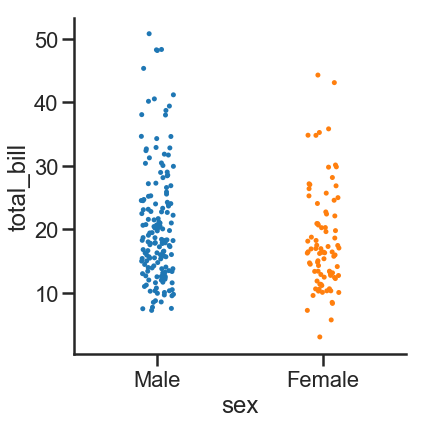

In [52]:
sns.catplot(x="sex", y="total_bill", kind="strip", height=6, data=tips) 
plt.show()

# sns.stripplot(x="day", y="total_bill", data=tips)

<i> From this we can see that males seem to pay for the total_bill more than females as there are more data points. The majortiy of the point reside in the region of 10 to 25 dollars for both genders, females seem to be slighly lower near the top end of the range. </i> 

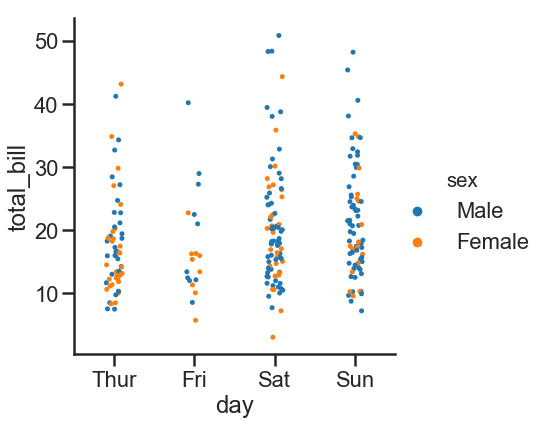

In [53]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="strip", height=6, data=tips) 
plt.show()

<i> From this plot we can see that that the total bill was highest on Saturday and paid by males. Sunday is slightly lower than Saturday but there seems to be alot more males paying the bill on that day. The lowest total bill was on Saturday and paid by females. There seems to be fewer data points on Thursday and Friday which is as expected as they do not have lunch sittings on those days. </i>

<a name="swarm"></a>
### Swarmplot

               mean
            percent
sex    day         
Male   Thur   16.53
       Fri    14.34
       Sat    15.16
       Sun    16.23
Female Thur   15.75
       Fri    19.94
       Sat    15.65
       Sun    18.16
Total         16.08


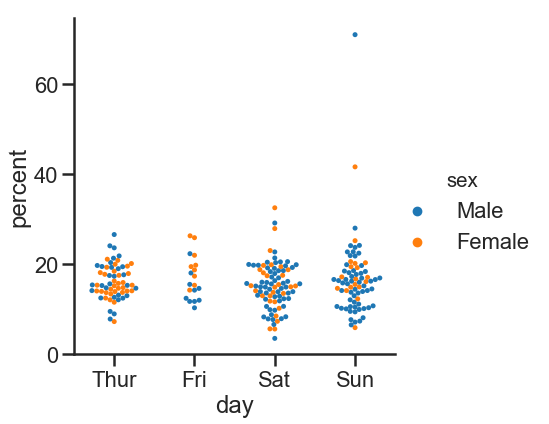

In [54]:
# https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e\n

# Numerical representation of the mean of the percent for sex of the customer
print(round(pd.pivot_table(tips, index=['sex', 'day'], values=['percent'], aggfunc=['mean'], margins=True, margins_name='Total', fill_value=0),2))

sns.catplot(x="day", y="percent",hue="sex", kind="swarm", height=6, data=tips) 
plt.show()
# sns.swarmplot(x="day", y="percent", hue="sex", data=tips)

<i> The swarmplot shows the percent tipped over the course of the week. Percent refers to amount tipped with respects the total bill. On Thursday percent tipped for males and females is similar with the males being slightly higher. Friday on the otherhand females seem to tip at a much higher percent. Saturday percent tipped for males and females are very similar, we can see that the lowest tip is on Sturday by a male. Sunday we can see there are a number of outliers there is a male outlier at the top and a smaller female outlier, from the plot it is difficult to see who earns more so I decided to get the average percent for each sex and from this we can see females on average tip more on Sunday </i>

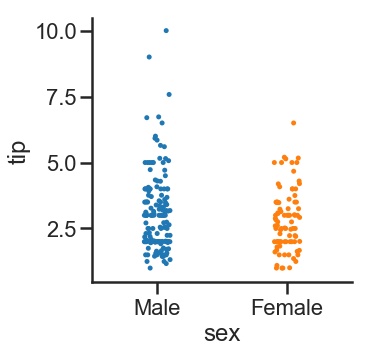

In [55]:
sns.catplot(x="sex", y="tip", data=tips)

<i> From the above plot we can see that the males tipped the highest between the 2 genders. However when we look at the where the majority of the points lie they seem to be closer to 2 for females and clodser to 3 for males. </i>

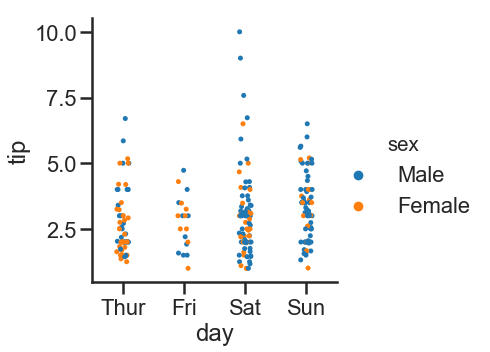

In [56]:
sns.catplot(x="day", y="tip", hue="sex", data=tips)

<i> From this we can see that the tips tend to higher as we head into the weekend. Interestingly it seems to be males who tip highest on Saturday and Sunday The majority of tips reside in the 2 -4 dollar region. Interestingly on Firday demales seem to tip more than males but the tips seem to be lower than on the other days of the week. </i>

<a name="dist"></a>
## Distplot:

Displot combines the function of a histogram and the KDE (density) plot into the same plot using the seaborn package. The x-axis represents a feature e.g. total_bill and the y-axis is a count of the number oof points that exist in the given range. Thus, we can  determine how many points are in particular regions.[11].

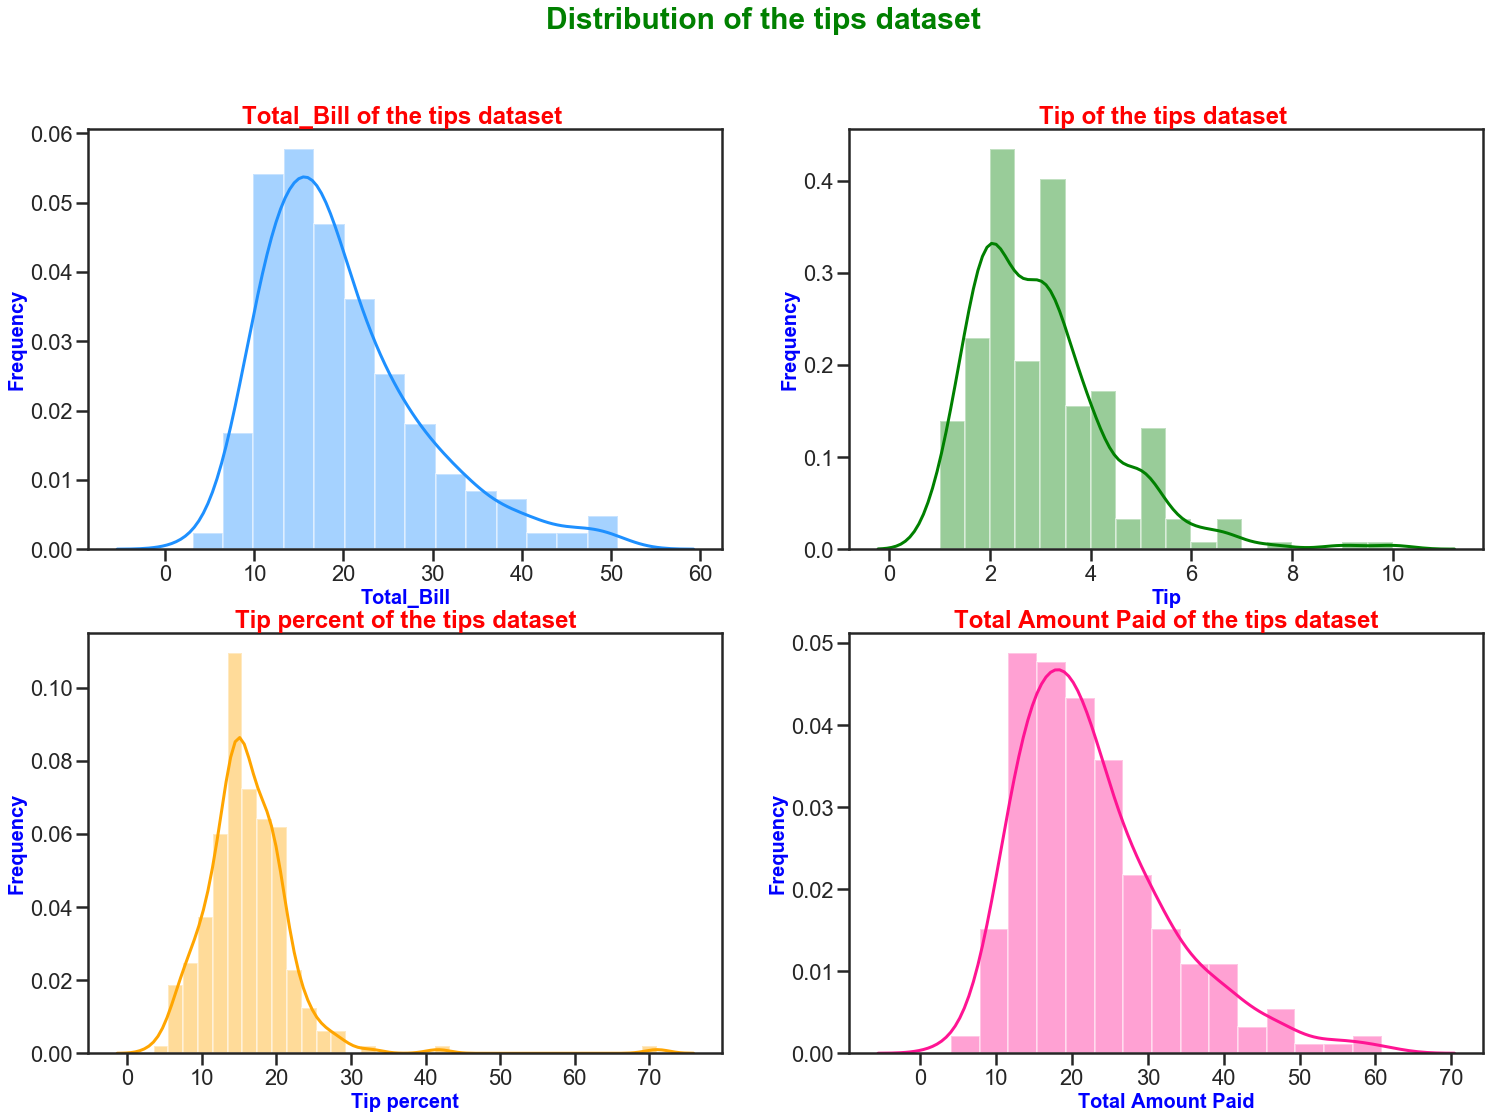

In [57]:
plt.suptitle("Distribution of the tips dataset",fontweight="bold", fontsize="30", color="g" )                   # Overall heading for the graph

plt.subplot(2,2,1)                                                                                              # Makes a top left subplot active in a 2x2 subplot layout
sns.distplot(tips.total_bill , color="dodgerblue")                                 # Plot total bill 
plt.xlabel("Total_Bill", fontweight="bold", fontsize="20", color="b")                                           # Label of the x-axis
plt.ylabel("Frequency", fontweight="bold", fontsize="20", color="b")                                            # Label of the y-axis
plt.title("Total_Bill of the tips dataset ", fontweight="bold", fontsize="24", color="r")                           # Label title of distplot

plt.subplot(2,2,2)                                                                                              # Makes a top right subplot active in a 2x2 subplot layout
sns.distplot(tips.tip , color="green")              
plt.xlabel("Tip", fontweight="bold", fontsize="20", color="b")                                           # Label of the x-axis
plt.ylabel("Frequency", fontweight="bold", fontsize="20", color="b")                                            # Label of the y-axis
plt.title("Tip of the tips dataset ", fontweight="bold", fontsize="24", color="r")                           # Label title of distplot


plt.subplot(2,2,3)                                                                                              # Makes a bottom left subplot active in a 2x2 subplot layout             # Plot setosa species petal length
sns.distplot(tips.percent , color="orange")              
plt.xlabel("Tip percent", fontweight="bold", fontsize="20", color="b")                                         # Label of the x-axis
plt.ylabel("Frequency", fontweight="bold", fontsize="20", color="b")                                                # Label of the y-axis
plt.title("Tip percent of the tips dataset", fontweight="bold", fontsize="24", color="r")                           # Label title of distplot


plt.subplot(2,2,4)                                                                                             # Makes a bottom right subplot active in a 2x2 subplot layout
sns.distplot( tips.total_amount , color="deeppink")        
plt.xlabel("Total Amount Paid", fontweight="bold", fontsize="20", color="b")                                         # Label of the x-axis
plt.ylabel("Frequency", fontweight="bold", fontsize="20", color="b")                                                # Label of the y-axis
plt.title("Total Amount Paid of the tips dataset", fontweight="bold", fontsize="24", color="r")                           # Label title of distplot                                                        

plt.show()                                                                                                     # Display the distplot


<b> From the above distplots we can see the following: </b>

<b><i><u> Total Bill Graph:  </u></i></b>

   * Single peaked (unimodel) distribution: Total Bills mostly fall in the range of \$12 - \\$18
   * Skewed to the right, here we can see tat the the right tail with the larger values is much longer than the left tail which is the smaller values. 
    
<b><i><u> Tip Graph: </u></i></b>

   * Bimodal distribution (2 peaks) one peak at \$2.50 and another peak at \\$3.50
   * Most of the tips fall in the range \$2 - \\$4.0
 
<b><i><u> Tip percent (tip as a percent of the total_bill)  </u></i></b>
    
   * Bell shaped distribution witht the majority of the tips in the 10% - 20% range 
   * The peak of the curve is at 15% which represents the mode (value tipped the most)
   * There are a number of outliers present at the 40% and 70% mark

<b><i><u> Total Amount Customers paid  </u></i></b>

   * Single peaked (unimodel) distribution: Total Amount Paid mostly fall in the range of \$14 - \\$28
   * Skewed to the right, here we can see tat the the right tail with the larger values is much longer than the left tail which is the smaller values. 

<a name="linear"></a>
## Linear Regression

Linear regression is a basic and commonly used type of predictive analysis. 
The aim of linear regression is to model the relationship between dependent variable (Y) and one or more independent variables (X) using a best fit straight line (also known as regression line). [3] Best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line.[4]

Regression analysis can be used to do the following:
 * Predict the value of dependent variable (x) based on the value of at least one independent variable
 * Analyze the impact of changes in an independent variable on the dependent variable

Seaborn makes it simple to compute and visualise regressions of varying orders.
Regplot and implot are the two main seaborn features that are used to visualize the linear relationship determined by regression. The 2 functions are closely related and share alot of the core functionality.t the most basic level both functions generate a scatterplot of 2 variables often denoted x and y, and then  fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression.[5].

* regplot() accepts the x and y variables in a variety of formats including simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame object passed to data. 
* lmplot() has data as a required parameter and the x and y variables must be specified as strings. This data format is called “long-form” or “tidy” data. [6]

### Calculate the slope, vertical intercept and line fo best fit for the total bill and tip

There are a number of ways that slope and vertical intercept can be calculated which I will outline below:

In [58]:
# Method 1:

# Calculate slope and vertical intercept for the line 
# Adapted from: https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/linear-regression-derived.ipynb

# Calculate the mean for the total bill and tip
total_avg = tips["total_bill"].mean()
tip_avg = tips["tip"].mean()

# Subtract means from total bill and total tip
total_zero = tips['total_bill'] - total_avg
tip_zero = tips['tip'] - tip_avg

# Calaculate the slope of the line: 
m = np.sum(total_zero * tip_zero) / np.sum(total_zero * total_zero)

# Calculate the Intercept of the line 
c = tip_avg - m * total_avg

print(" \n Total Bill and Tip:")
print("\n Slope of the line : %8.2f \n Vertical intercept of the line : %6.2f." % (m, c))

# Line of best fit   
print(f" Best fit line : y = {m : 4.2f} x + {c : 5.3f}\n")

 
 Total Bill and Tip:

 Slope of the line :     0.11 
 Vertical intercept of the line :   0.92.
 Best fit line : y =  0.11 x +  0.920



In [59]:
# Method 2: To caculate the slope and vertical intercept
print(" \n Total Bill and Tip:")
x= np.polyfit(tips['total_bill'],tips['tip'],1)
print("\n Slope of the line:", x[0], "\n Vertical Intercept:", x[1])

 
 Total Bill and Tip:

 Slope of the line: 0.10502451738435338 
 Vertical Intercept: 0.9202696135546737


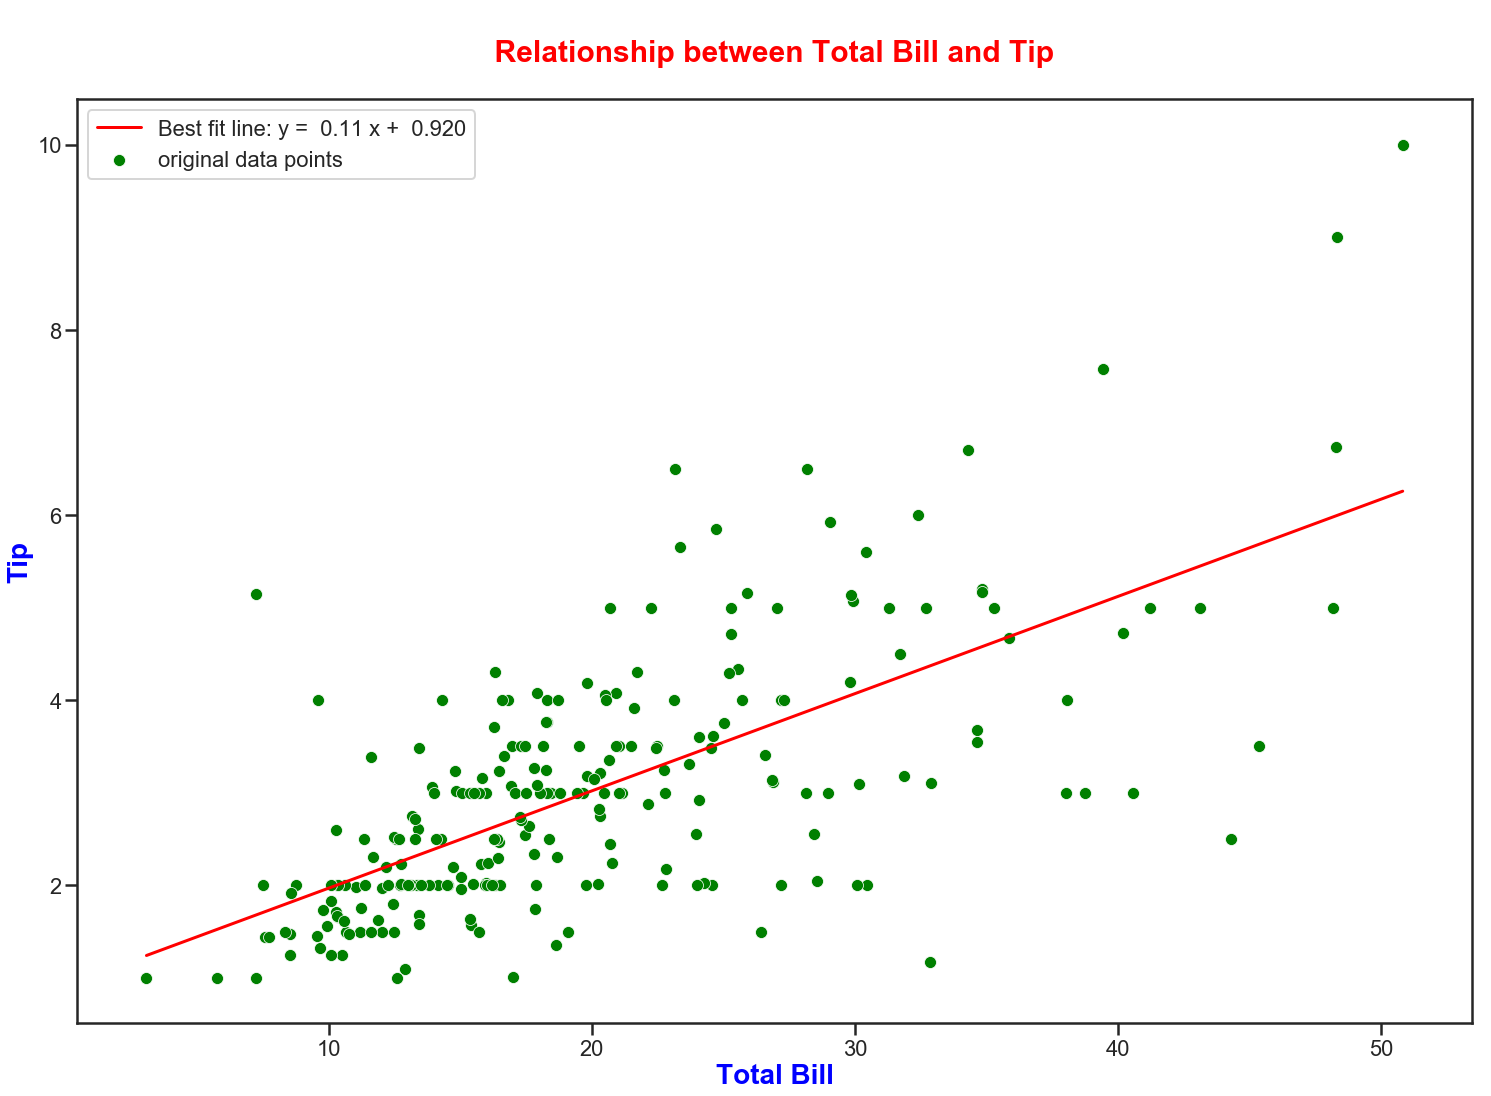

In [60]:
tips.loc[:,'mx+c'] = tips.loc[:,'total_bill'] * m + c
sns.lineplot(x="total_bill", y="mx+c", label="Best fit line: y =  0.11 x +  0.920", color="r", data=tips)
sns.scatterplot(x="total_bill", y="tip" ,label="original data points", color="g", marker="o", data=tips)

# Formating of the plot
plt.xlabel("Total Bill", fontweight="bold", fontsize="28", color="b")                                         
plt.ylabel("Tip", fontweight="bold", fontsize="28", color="b")                                          
plt.title("\n Relationship between Total Bill and Tip \n ", fontweight="bold", fontsize="30", color="r")  
plt.show()

<i> This linear line across our plot is the best available fit for the trend of the tip usually customers give with respect to the total bill that gets generated. And the data points that we see at extreme top right which are far away from this line are known as outliers in the dataset. We may think of outliers as exceptions. 

By looking at this plot  we can say that if the total bill is around \$20.00, then it shall get a tip of roughly \\$3.00. </i>

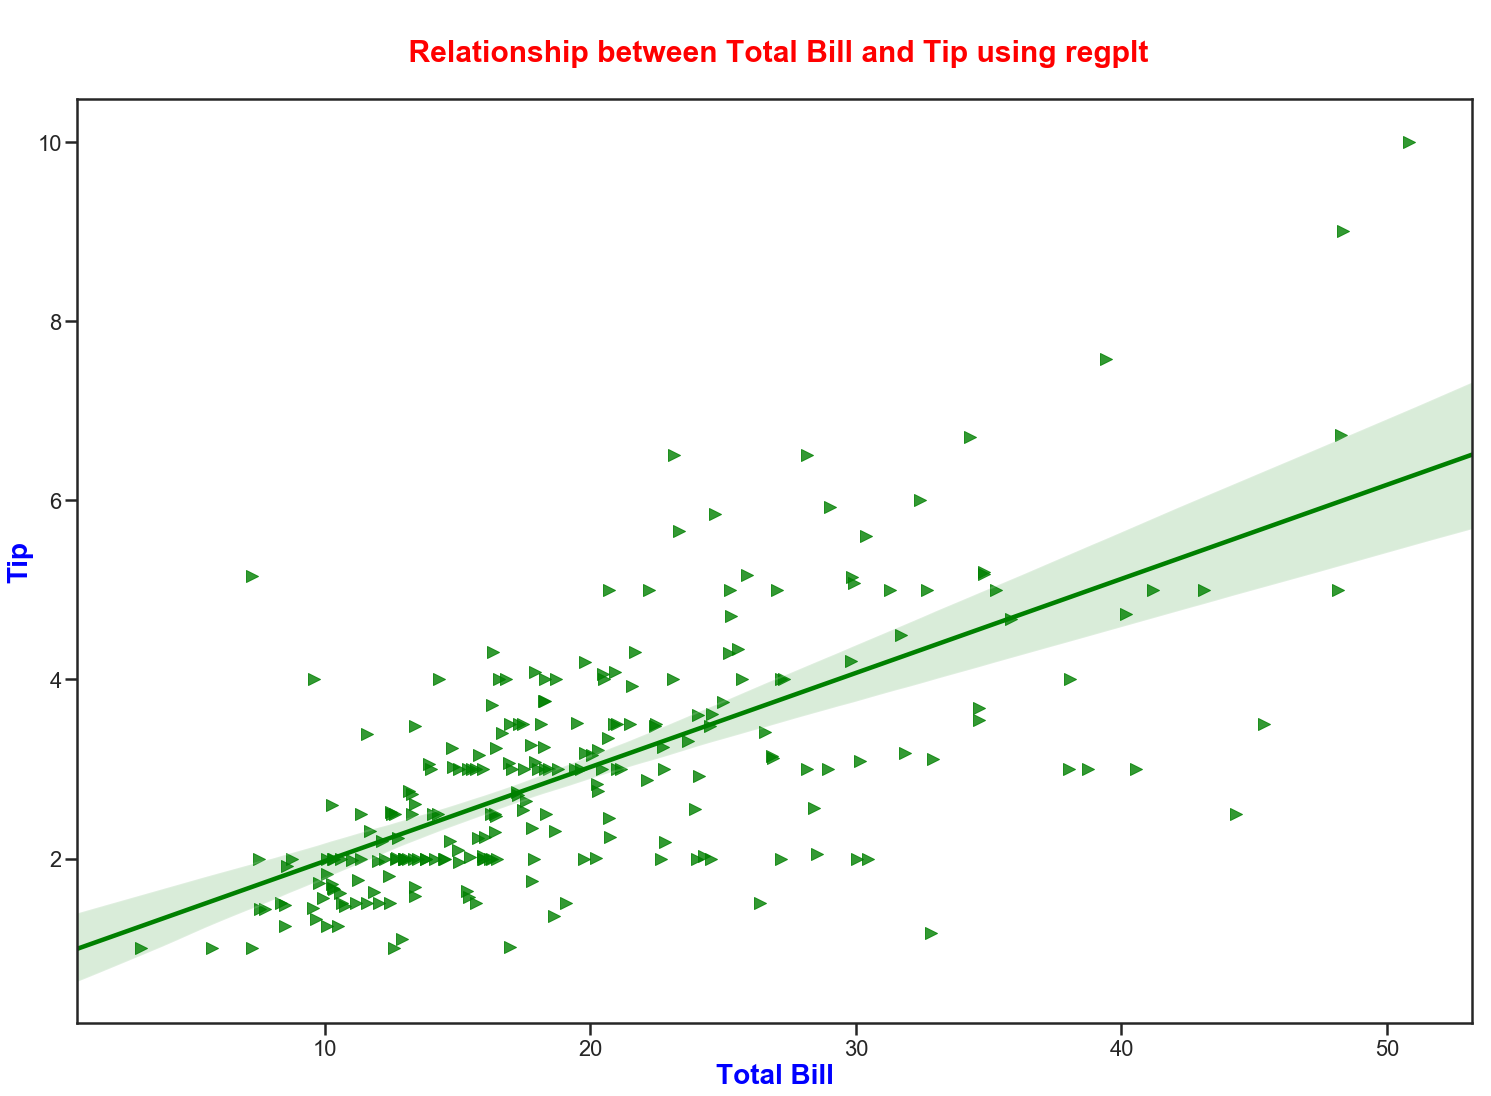

In [61]:
sns.regplot(x="total_bill", y="tip",marker=">",color="g", data=tips)
# Formating of the plot
plt.xlabel("Total Bill", fontweight="bold", fontsize="28", color="b")                                        
plt.ylabel("Tip", fontweight="bold", fontsize="28", color="b")                                              
plt.title("\n Relationship between Total Bill and Tip using regplt\n ", fontweight="bold", fontsize="30", color="r")  
plt.show()

<b> Regplot </b><i>As stated earleir regplot creates a scatterplot of the two variables Total_Bill and Tip and then it fits a regrerssion line and a 95% confidence interval. As we would expect, there is a positive association between total bill and tip </i> [7]

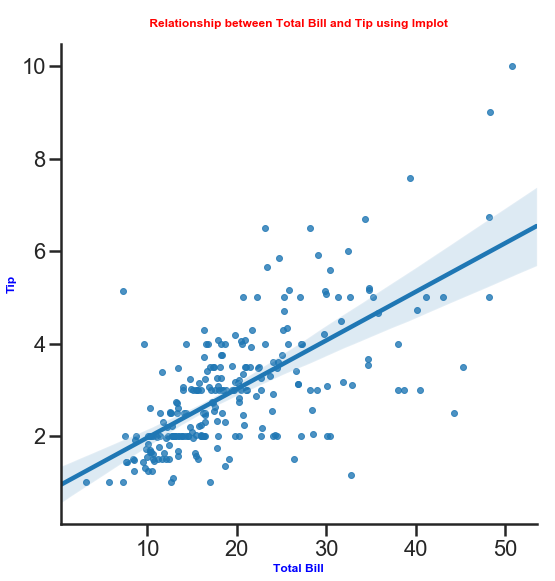

In [62]:
# Fit regression model with single line using total_bill and tip
sns.lmplot(x="total_bill", y="tip",markers=".", size=8, data=tips)

# Formating of the plot

plt.xlabel("Total Bill", fontweight="bold", fontsize="12", color="b")                                         
plt.ylabel("Tip", fontweight="bold", fontsize="12", color="b")                                            
plt.title("\n Relationship between Total Bill and Tip using Implot \n ", fontweight="bold", fontsize="12", color="r")  
plt.show()

<b>lmplot:</b><i> As stated earlier another option which is less verbose is to use the Seaborn function implot which has a built-in functionality for automatically drawing linear regression line. There is a clear correlation between Total Bill and the amount Tipped. From this we can see that there are alot of values centering around the total_bill \\$18 - \\$20 region. </i>

<a name="pearson"></a>
### Pearson's Correlation Coefficient 

A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. Again there is more than one to get the correlation between 2 variables in this case total bill and tip.

In [63]:
# Adapted from: https://dfrieds.com/math/correlation

# Method 1: To calculate the correlation

print("\n Pearson Correlation:", round(stats.pearsonr(tips['tip'], tips['total_bill'])[0], 2))

# Method 2: To calculate the correlation 
# This method is coded out because it does same as metod 1
# print("\n Pearson Correlation: \n", tips[['tip', 'total_bill']].corr())


 Pearson Correlation: 0.68


<i> Pearson Correlation confirms there is a strong positive correlation between the two variables total_bill and tip. This indicates that as the total bill increases so to does the tip. </i>

<b> Heatplot </b>

Heat maps display numeric tabular data where the cells are colored depending upon the contained value. Heat maps are great for making trends in this kind of data more readily apparent, particularly when the data is ordered and there is clustering. [8]

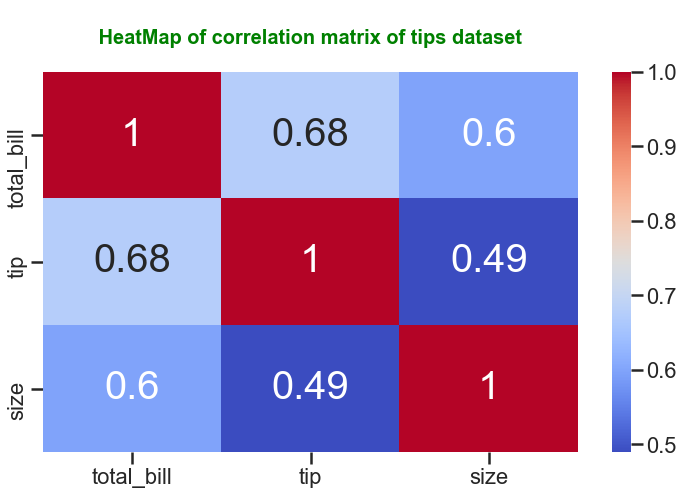

In [100]:
# Method 3: To calculate the correlation between total bill andt tip 
plt.figure(figsize=(12,7))
df= tips[["total_bill", "tip", "size"]]
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, annot_kws={"size": 40})
plt.title("\n HeatMap of correlation matrix of tips dataset \n", fontweight="bold", fontsize="20", color="g")
plt.show()

### k-nearest neighbours algorithm

This is a simple algorithm commonly used in supervised machine learning which can be used for classification and regression problems. It works based on minimum distance from the query instance to the training samples to determine the K neighbours. Once the K nearest neighbours are got the simple mahority of these KNN to be the prediction of the query instance. [8]


In [65]:
# Adapted from Jupyter notebook 
# https://books.google.ie/books?id=7zhDDwAAQBAJ&pg=PT358&lpg=PT358&dq=X+%3D+tips%5B%27total_bill%27%5D.values.reshape(-1,1)+Y+%3D+tips%5B%27tip%27%5D.values.reshape(-1,1)&source=bl&ots=vHyyJ7sVqy&sig=ACfU3U1WQO1y3kwv3o_xi-PomAdcojqz9g&hl=en&sa=X&ved=2ahUKEwjtuMrfmovmAhV1o3EKHaAfBpgQ6AEwAHoECAkQAQ#v=onepage&q=X%20%3D%20tips%5B'total_bill'%5D.values.reshape(-1%2C1)%20Y%20%3D%20tips%5B'tip'%5D.values.reshape(-1%2C1)&f=false

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

# We need to fix the data by reshaping the inputs (x) values when we have single feature

X =  tips['total_bill'].values.reshape(-1,1)
y = tips['tip'].values.reshape(-1,1)

# Split the dataset: 66% data to the training set and 33% data to the test set
# random_state sets a seed to the random generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("X_train:", len(X_train))
print("X_test:", len(X_test))

X_train: 163
X_test: 81


<b> Mean Squared Error </b>

This tells us how close a regression line is to a set of points. It works by squaring the distance from every data point to the regression line. These distances are known as "errors. The reason why the "errors" are squared to prevent negative values from cancelling out positive values and give more weight to larger differences. It is referred to mean squared error as they are finding average of a set of errors. Small mean square error the closer you are to finding the line of best fit. Hence it is always non-zero and values closer to zero are better.
[9]

<b>R2 </b>

This is a statistical measure of fit that tells us how much variation of a dependent variable is explained by the independent variable(s) in a regression model. R2 values range from 0 to 1. 100% r2 means that all dependent variables are completely explained by the indepedent variable


In [66]:
# Adapted from: https://books.google.ie/books?id=7zhDDwAAQBAJ&pg=PT358&lpg=PT358&dq=X+%3D+tips%5B%27total_bill%27%5D.values.reshape(-1,1)+Y+%3D+tips%5B%27tip%27%5D.values.reshape(-1,1)&source=bl&ots=vHyyJ7sVqy&sig=ACfU3U1WQO1y3kwv3o_xi-PomAdcojqz9g&hl=en&sa=X&ved=2ahUKEwjtuMrfmovmAhV1o3EKHaAfBpgQ6AEwAHoECAkQAQ#v=onepage&q=X%20%3D%20tips%5B'total_bill'%5D.values.reshape(-1%2C1)%20Y%20%3D%20tips%5B'tip'%5D.values.reshape(-1%2C1)&f=false

# Create linear regression object
lr = LinearRegression()

# Specify the predictor X and the response y 
lr.fit(X_train, y_train)
predict = lr.predict(X_test)

# Mean Squared Error rounded to 2 decimal places
print("\n Mean Square Error : {}".format(round(mean_squared_error(y_test, predict), 2)))

# Calculate r squared rounded to 2 decimal places 
print("\n R-Squared         : {}".format(round(lr.score(X_train,y_train), 2)))

# Determine the how accurate this algorthm is at predicting values
y_predict= lr.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})
df


 Mean Square Error : 0.78

 R-Squared         : 0.46


,Actual,Predicted
0,3.18,3.044742
1,2.00,1.804854
2,2.00,3.575481
3,5.16,3.725838
4,2.00,2.279490
5,2.00,2.828182
6,2.56,4.011966
7,2.52,2.221142
8,3.23,2.479218
9,3.00,2.546543


<i> Mean Square error is 0.78, the closer the MSE value is to zero (but not zero) the higher the accuracy of prediction i.e. there would be an ideal match between the actual and predicted dataset. The r2 value is 0.46 which means that 46% of the model can be explained by the inputs. The lower the r2 value would indicate a low level of correlation thus the regression model that is not valid </i>

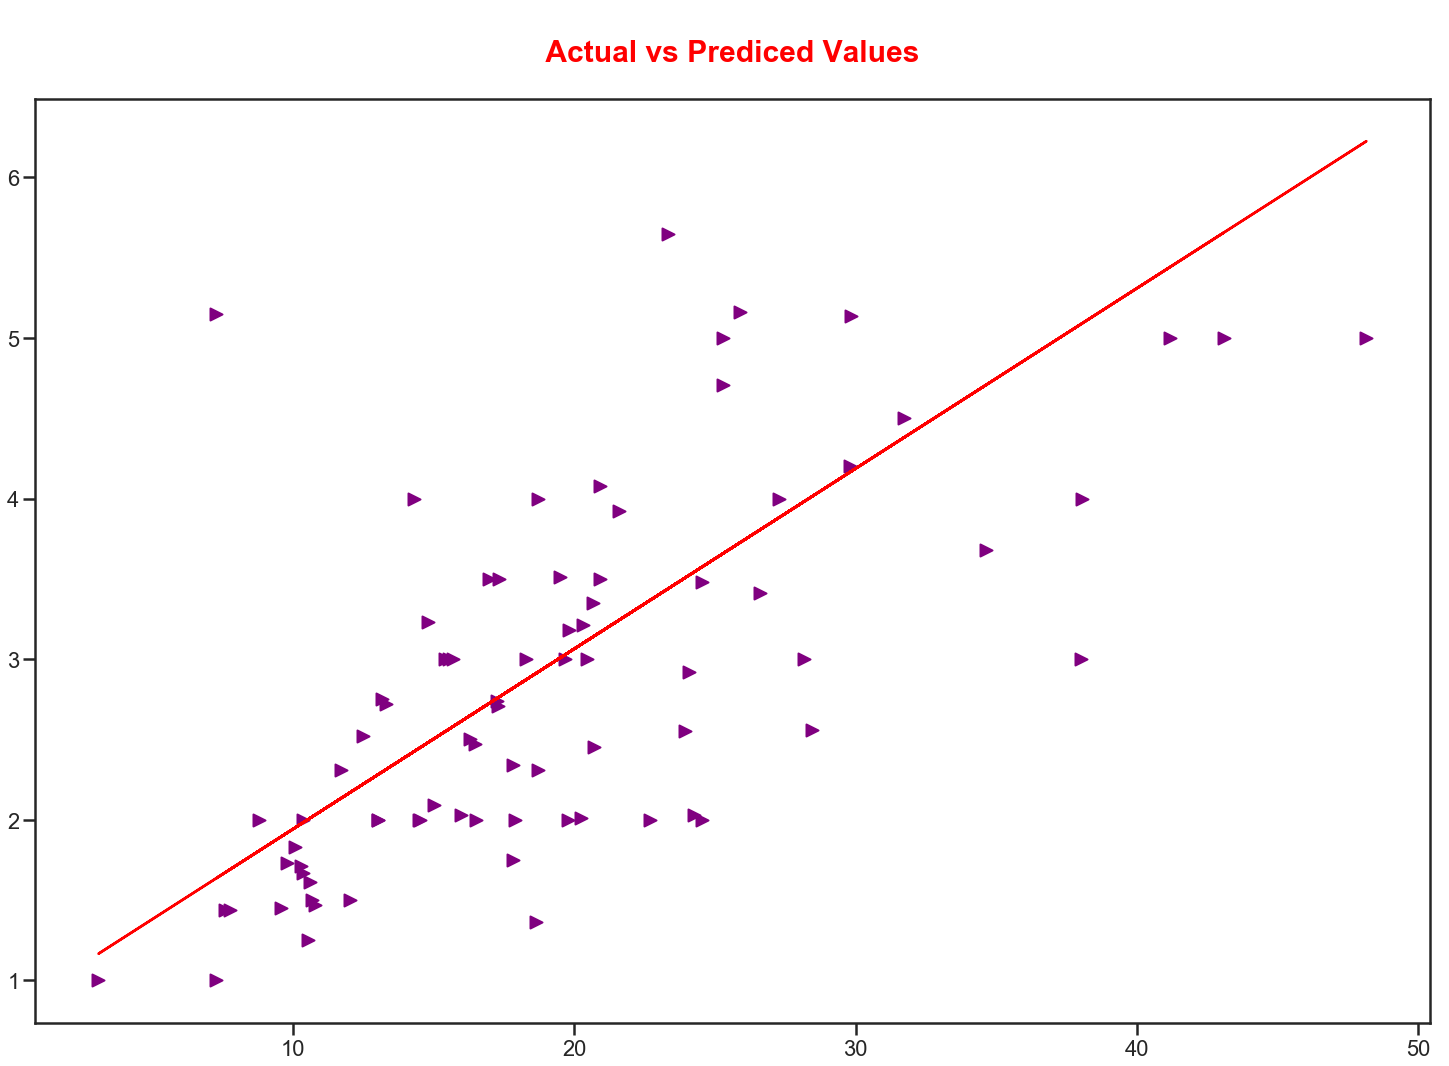

In [67]:
plt.scatter(X_test, y_test,  color='purple', marker=">")
plt.plot(X_test, y_predict, color='r', linewidth=2.5)                                       
plt.title("\n Actual vs Prediced Values \n ", fontweight="bold", fontsize="30", color="r")  
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


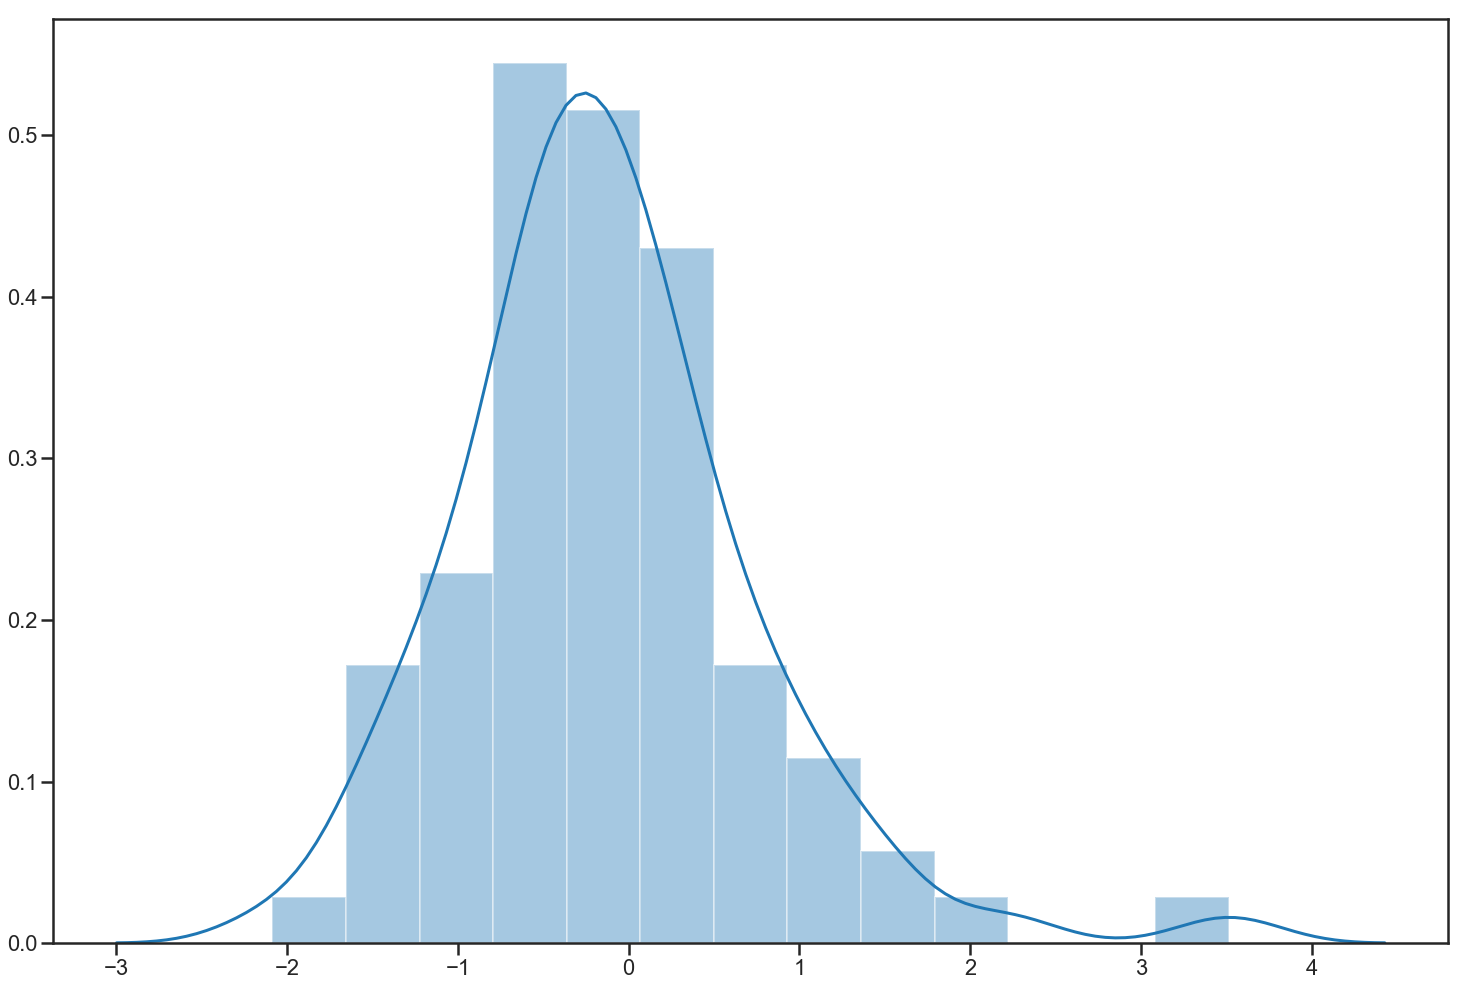

In [68]:
print(sns.distplot(y_test-predict))

We can see from the graph that most of the times the predictions were correct (difference = 0). 

<a name="var"></a>
## Relationship between the other variables

<a name="time"></a>
### Relationship between time, total bill and tip

In this section I hope to explore if the time the table was served i.e. Lunch or Dinner impacted the amount the server was tipped or the cost of the total bill. 

In [69]:
# Numerical representation of the mean of the total bill and tip over the days
round(pd.pivot_table(tips, index=['time'], values=['size', 'tip', 'total_bill'], aggfunc=['sum','mean'], margins=True, margins_name='Total', fill_value=0).T,2)

time               Lunch   Dinner    Total
sum  size         164.00   463.00   627.00
     tip          185.51   546.07   731.58
     total_bill  1167.47  3660.30  4827.77
mean size           2.41     2.63     2.57
     tip            2.73     3.10     3.00
     total_bill    17.17    20.80    19.79

<i> <b> Tips: </b>
    
From the above table we can see that in total the customers  tipped higher for Dinner $546.07  which represents 75% of the overall amount tipped to the waiter for that time in that week. However this does not account for the fact that the group size for dinner and lunch is different with dinner accounting for 74% of the overall customers. Although this seems high for dinner perhaps it could be explained for the fact that there is no lunch served on Saturday and Sunday. That is why the lunch group size represents 36% of the total customers and equates for 25% of the overall total bill. However, when we look at the average tips received for both time periods i.e. the average tip at lunch accounts for 53%  and dinner accounts for 47% of the overall average tip.</i>

<i><b> Total Bill:</b> 

Again similar to the tip we would expect the total_bill would be higher for Dinner as there are more sittings which it is at 76% of the overall bill paid. The breakdown of the mean total_bill again is lower for Lunch and higher for Dinner than the overall average total bill. Mean total_bill for Lunch represents 45% of the overall average bill. </i>


In [73]:
# Calculate slope and vertical intercept for the line 
# Adapted from: https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/linear-regression-derived.ipynb

lunch = tips [tips ['time'] == "Lunch"]
dinner = tips [tips ['time'] == "Dinner"]

print("\n **********************************************************************")
print("                                 Lunch                                ") 
print("**********************************************************************")

# Calculate the mean for the total bill and tip
lunch_x_avg = lunch["total_bill"].mean()
lunch_y_avg = lunch["tip"].mean()

# Subtract means from total bill and total tip
lunch_x_zero = lunch['total_bill'] - lunch_x_avg
lunch_y_zero = lunch['tip'] - lunch_y_avg

# Calaculate the slope of the line: 
m_lunch = np.sum(lunch_x_zero * lunch_y_zero) / np.sum(lunch_x_zero * lunch_x_zero)

# Calculate the Intercept of the line 
c_lunch = lunch_y_avg - m_lunch * lunch_x_avg
print("\n Slope of the line = %8.2f \n Vertical intercept of the line = %6.2f." % (m_lunch, c_lunch))

# Line of best fit
print(f"\n Best fit line: y = {m_lunch : 4.2f} x + {c_lunch : 5.3f}")

print("\n **********************************************************************")
print("                                Dinner                                ") 
print("**********************************************************************")
# Calculate the mean for the total bill and tip
dinner_x_avg = dinner["total_bill"].mean()
dinner_y_avg = dinner["tip"].mean()

# Subtract means from total bill and total tip
dinner_x_zero = dinner['total_bill'] - dinner_x_avg
dinner_y_zero = dinner['tip'] - dinner_y_avg

# Calaculate the slope of the line: 
m_dinner = np.sum(dinner_x_zero * dinner_y_zero) / np.sum(dinner_x_zero * dinner_x_zero)

# Calculate the Intercept of the line 
c_dinner = dinner_y_avg - m_dinner * dinner_x_avg

print("\n Slope of the line = %8.2f \n Vertical intercept of the line = %6.2f. " % (m_dinner, c_dinner))

# Line of best fit
print(f" Best fit line: y = {m_dinner : 4.2f} x + {c_dinner : 5.3f}\n")
print("\n **********************************************************************")


 **********************************************************************
                                 Lunch                                
**********************************************************************

 Slope of the line =     0.13 
 Vertical intercept of the line =   0.57.

 Best fit line: y =  0.13 x +  0.567

 **********************************************************************
                                Dinner                                
**********************************************************************

 Slope of the line =     0.10 
 Vertical intercept of the line =   1.03. 
 Best fit line: y =  0.10 x +  1.035


 **********************************************************************


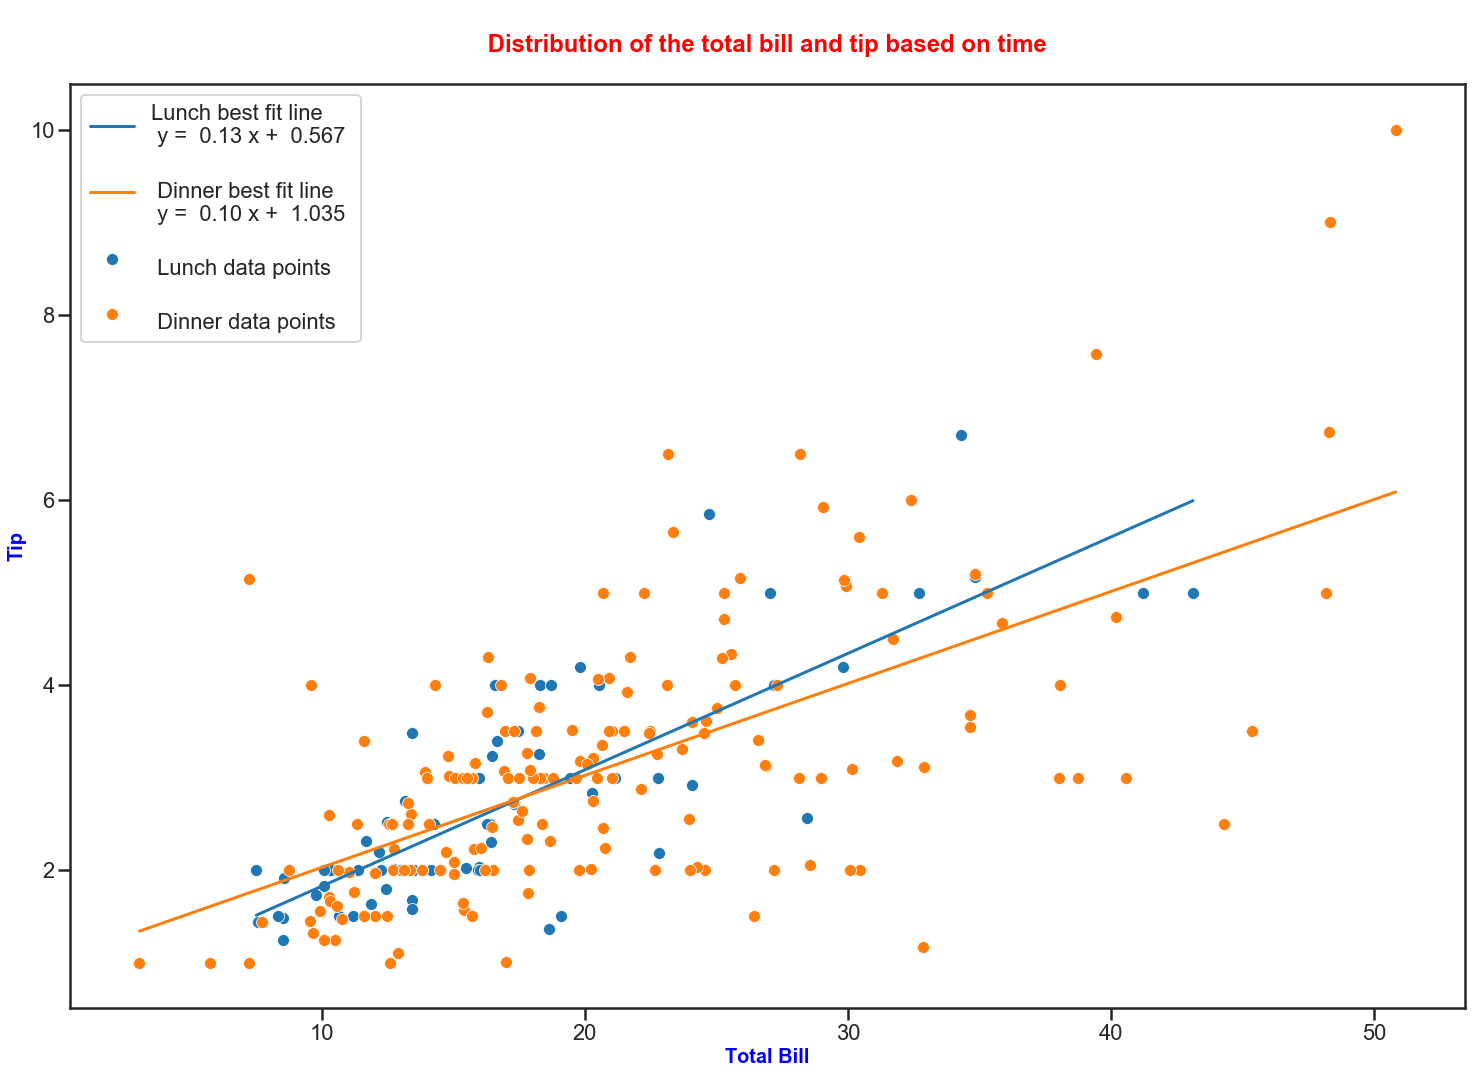

In [74]:

lunch.loc[:,'mx+c'] = lunch.loc[:,'total_bill'] * m_lunch + c_lunch
dinner.loc[:,'mx+c'] = dinner.loc[:,'total_bill'] * m_dinner + c_dinner
sns.lineplot(x="total_bill", y="mx+c", label="Lunch best fit line \n y =  0.13 x +  0.567 ", data=lunch)
sns.scatterplot(x="total_bill", y="tip", label="\n Lunch data points", data=lunch)
sns.lineplot(x="total_bill", y="mx+c", label="\n Dinner best fit line \n y =  0.10 x +  1.035", data=dinner)
sns.scatterplot(x="total_bill", y="tip", label="\n Dinner data points", data=dinner)
# Format of the plot
plt.xlabel("Total Bill", fontweight="bold", fontsize="20", color="b")                                       
plt.ylabel("Tip", fontweight="bold", fontsize="20", color="b")                                           
plt.title("\n Distribution of the total bill and tip based on time \n", fontweight="bold", fontsize="24", color="r")
plt.show()

<i> From this we can seee that the data points for lunch appear closer to the line of best firt than for dinner. There are a number of outliers for Dinner towards the top right of the plot. </i>

<a name="day"></a>
### Relationship between total bill, tip and day

In [75]:
# Numerical representation of the mean of the total bill and tip over the days
round(pd.pivot_table(tips, index=['day'], values=['total_bill','tip','size'], aggfunc=['sum','mean'], margins=True, margins_name='Total', fill_value=0).T,2)

day                 Thur     Fri      Sat      Sun    Total
sum  size         152.00   40.00   219.00   216.00   627.00
     tip          171.83   51.96   260.40   247.39   731.58
     total_bill  1096.33  325.88  1778.40  1627.16  4827.77
mean size           2.45    2.11     2.52     2.84     2.57
     tip            2.77    2.73     2.99     3.26     3.00
     total_bill    17.68   17.15    20.44    21.41    19.79

<i> <b> Tips: </b> 
    
From the above table we can see that in total Saturday tips were the highest 260.40  dollars which represents ~36% of the overall amount tipped to the waiter in that week. However this does not account for the fact that the size of the group that enters the restaurant on each of the days with Saturday accounting for 35% of the overall number of customers in the restaurant that week. In total Friday's tips were the lowest $//51.96 which represents ~7% of the overall amount tipped to the waiter in that week but again this only represents 6% of the total group size that entered the restaurant that week.

From the table we can see that the mean tip is similar across the board with Sunday being tipped the highest and in fact it is the only day which is higher than the overall average tip for the week of $3.00, it represents 28% of the tips given in that week. The lowest average tip was on Friday which represents 18% of the overall tips given that week. </i>

<i><b> Total Bill:</b>  

From the above table we can see that in total Saturday total bill were the highest $1778.40  which represents 37% of the overall total bill to the waiter in that week. However this does not account for the fact that the size of the group that enters the restaurant on each of the days with Saturday accounting for 35% of the overall number of customers in the restaurant that week. In total Friday's total bill is lowest on Firday ~7% which accounts for 6% of the overall customers entering the restaurant that week. Again the average total bill is better as we can see that the total bill is higher on Saturday and Sunday than the average total bill for that week. This is interesting as people seems to spend more money at the weekend. The lowest again is Friday at 22% of the overall bill and the highest is Sunday 27% of the overall total bill. </i>

In [76]:
# Calculate slope and vertical intercept for the line 
# Adapted from: https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/linear-regression-derived.ipynb

Thursday = tips [tips ['day'] == "Thur"]
Friday = tips [tips ['day'] == "Fri"]
Saturday = tips [tips ['day'] == "Sat"]
Sunday = tips [tips ['day'] == "Sun"]

print("\n **********************************************************************")
print("                              Thursday                                ") 
print("**********************************************************************")

# Calculate the mean for the total bill and tip
Thursday_x_avg = Thursday["total_bill"].mean()
Thursday_y_avg = Thursday["tip"].mean()

# Subtract means from total bill and total tip
Thursday_x_zero = Thursday['total_bill'] - Thursday_x_avg
Thursday_y_zero = Thursday['tip'] - Thursday_y_avg

# Calaculate the slope of the line: 
m_Thursday = np.sum(Thursday_x_zero * Thursday_y_zero) / np.sum(Thursday_x_zero * Thursday_x_zero)

# Calculate the Intercept of the line 
c_Thursday = Thursday_y_avg - m_Thursday * Thursday_x_avg

print("\n Slope of the line = %8.2f \n Vertical intercept of the line = %6.2f." % (m_Thursday, c_Thursday))

# Line of best fit
print(f"\n Best fit line: y = {m_Thursday : 4.2f} x + {c_Thursday : 5.3f}\n")


# Method 2: To calculate the slope and vertical intercept
# np.polyfit(Thursday['total_bill'], Thursday['tip'],1)

print("\n **********************************************************************")
print("                               Friday                                 ") 
print("**********************************************************************")

# Calculate the mean for the total bill and tip
Friday_x_avg = Friday["total_bill"].mean()
Friday_y_avg = Friday["tip"].mean()

# Subtract means from total bill and total tip
Friday_x_zero = Friday['total_bill'] - Friday_x_avg
Friday_y_zero = Friday['tip'] - Friday_y_avg

# Calaculate the slope of the line: 
m_Friday = np.sum(Friday_x_zero * Friday_y_zero) / np.sum(Friday_x_zero * Friday_x_zero)

# Calculate the Intercept of the line 
c_Friday = Friday_y_avg - m_Friday * Friday_x_avg


print("\n Slope of the line = %8.2f \n Vertical intercept of the line = %6.2f." % (m_Friday, c_Friday))

# Line of best fit
print(f" Best fit line: y = {m_Friday : 4.2f} x + {c_Friday : 5.3f}\n")

# Method 2: To calculate the slope and vertical intercept
# np.polyfit(Friday['total_bill'], Friday['tip'],1)


print("\n **********************************************************************")
print("                              Saturday                                ") 
print("**********************************************************************")
# Calculate the mean for the total bill and tip
Saturday_x_avg = Saturday["total_bill"].mean()
Saturday_y_avg = Saturday["tip"].mean()

# Subtract means from total bill and total tip
Saturday_x_zero = Saturday['total_bill'] - Saturday_x_avg
Saturday_y_zero = Saturday['tip'] - Saturday_y_avg

# Calaculate the slope of the line: 
m_Saturday = np.sum(Saturday_x_zero * Saturday_y_zero) / np.sum(Saturday_x_zero * Saturday_x_zero)

# Calculate the Intercept of the line 
c_Saturday = Saturday_y_avg - m_Saturday * Saturday_x_avg

print("\n Slope of the line: %8.2f \n Vertical intercept of the line: %6.2f." % (m_Saturday, c_Saturday))

# Line of best fit
print(f" Best fit line: y = {m_Saturday : 4.2f} x + {c_Saturday : 5.3f}")

# Method 2: To calculate the slope and vertical intercept
# np.polyfit(Saturday['total_bill'], Saturday['tip'],1)



print("\n **********************************************************************")
print("                                Sunday                                ") 
print("**********************************************************************")


# Calculate the mean for the total bill and tip
Sunday_x_avg = Sunday["total_bill"].mean()
Sunday_y_avg = Sunday["tip"].mean()

# Subtract means from total bill and total tip
Sunday_x_zero = Sunday['total_bill'] - Sunday_x_avg
Sunday_y_zero = Sunday['tip'] - Sunday_y_avg

# Calaculate the slope of the line: 
m_Sunday = np.sum(Sunday_x_zero * Sunday_y_zero) / np.sum(Sunday_x_zero * Sunday_x_zero)

# Calculate the Intercept of the line 
c_Sunday = Sunday_y_avg - m_Sunday * Sunday_x_avg

print("\n Slope of the line = %8.2f \n Vertical intercept of the line = %6.2f" % (m_Sunday, c_Sunday))

# Line of best fit
print(f" Best fit line: y = {m_Sunday : 4.2f} x + {c_Sunday : 5.3f}")

print("\n **********************************************************************\n")
# Method 2: To calculate the slope and vertical intercept
# np.polyfit(Sunday['total_bill'], Sunday['tip'],1)


 **********************************************************************
                              Thursday                                
**********************************************************************

 Slope of the line =     0.13 
 Vertical intercept of the line =   0.51.

 Best fit line: y =  0.13 x +  0.512


 **********************************************************************
                               Friday                                 
**********************************************************************

 Slope of the line =     0.09 
 Vertical intercept of the line =   1.11.
 Best fit line: y =  0.09 x +  1.109


 **********************************************************************
                              Saturday                                
**********************************************************************

 Slope of the line:     0.12 
 Vertical intercept of the line:   0.52.
 Best fit line: y =  0.12 x +  0.519

 *******************

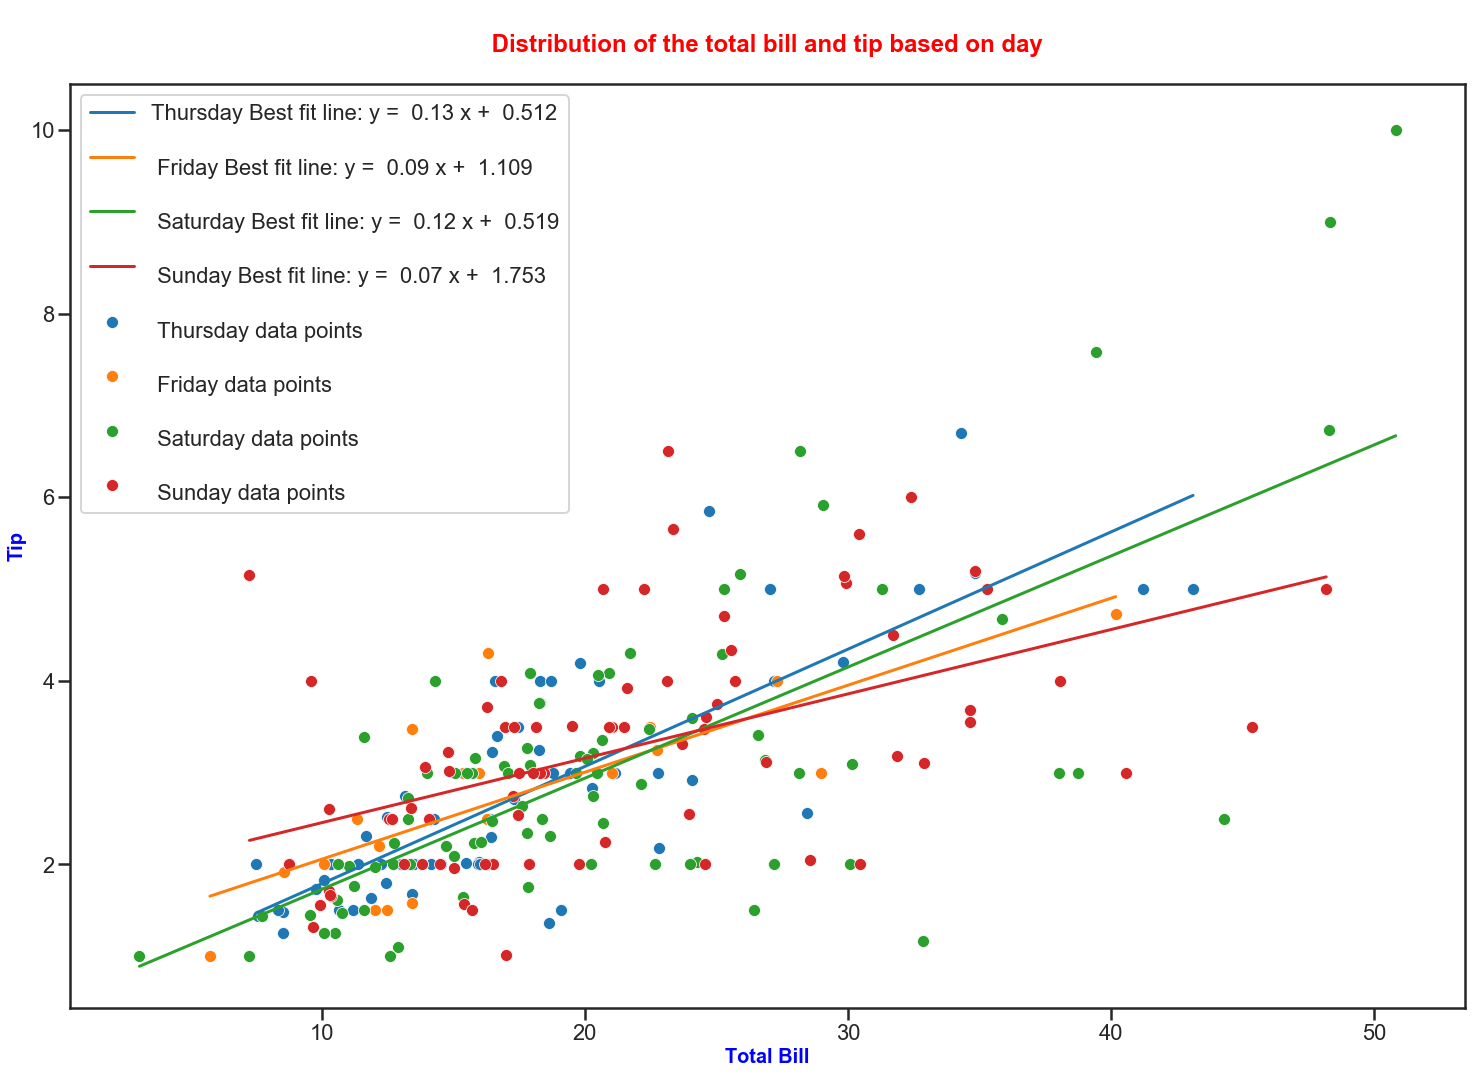

In [79]:

Thursday.loc[:,'mx+c'] = Thursday.loc[:,'total_bill'] * m_Thursday + c_Thursday
Friday.loc[:,'mx+c'] = Friday.loc[:,'total_bill'] * m_Friday + c_Friday
Saturday.loc[:,'mx+c'] = Saturday.loc[:,'total_bill'] * m_Saturday + c_Saturday
Sunday.loc[:,'mx+c'] = Sunday.loc[:,'total_bill'] * m_Sunday + c_Sunday

sns.lineplot(x="total_bill", y="mx+c", label="Thursday Best fit line: y =  0.13 x +  0.512", data=Thursday)
sns.scatterplot(x="total_bill", y="tip", label="\n Thursday data points", data=Thursday)
sns.lineplot(x="total_bill", y="mx+c", label="\n Friday Best fit line: y =  0.09 x +  1.109", data=Friday)
sns.scatterplot(x="total_bill", y="tip", label="\n Friday data points", data=Friday)
sns.lineplot(x="total_bill", y="mx+c", label="\n Saturday Best fit line: y =  0.12 x +  0.519", data=Saturday)
sns.scatterplot(x="total_bill", y="tip", label="\n Saturday data points", data=Saturday)
sns.lineplot(x="total_bill", y="mx+c", label="\n Sunday Best fit line: y =  0.07 x +  1.753", data=Sunday)
sns.scatterplot(x="total_bill", y="tip", label="\n Sunday data points", data=Sunday)

# Format of the plot
plt.xlabel("Total Bill", fontweight="bold", fontsize="20", color="b")                                       
plt.ylabel("Tip", fontweight="bold", fontsize="20", color="b")                                           
plt.title("\n Distribution of the total bill and tip based on day \n", fontweight="bold", fontsize="24", color="r")
plt.show()

<a name="dt"></a>
### Scatterplot to determine if day and time affect the total bill and tip 

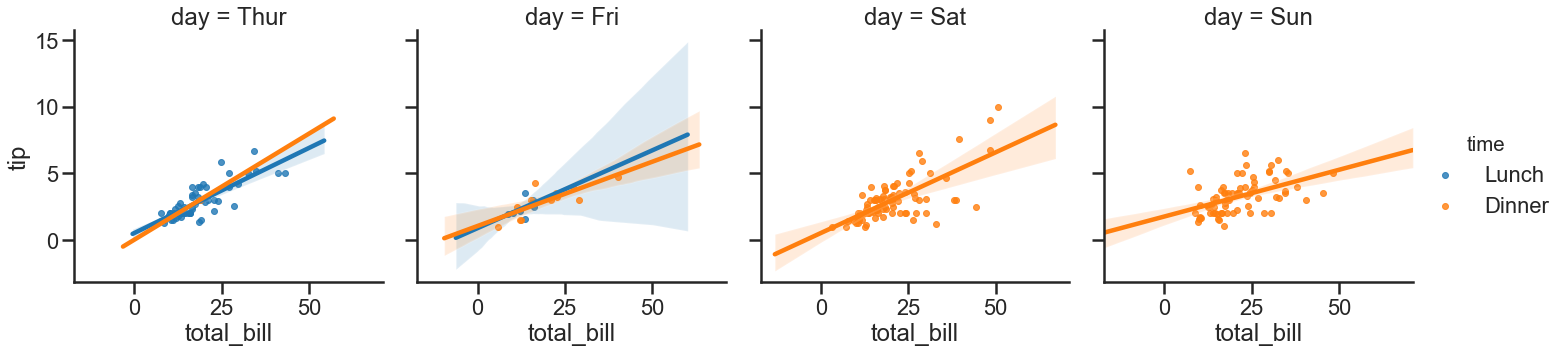

In [80]:
sns.lmplot(x="total_bill", y="tip",hue ='time', col='day', markers=".", data=tips)

<i> In the plot above we can see that on Thursday the majortiy of meals served were at Lunch. The number of meals served on Friday at Lunch is considerably lower than Thursday this may be for the fact there is more dinner served on Friday. We can see that Dinner was served on the days Thursay - Sunday whereas Lunch was only Thursday and Friday. The last thing we can see is there seeems to be more people served overall at Dinner than Lunch as there are significantly more data points for Dinner than for Lunch. </i>

<a name="smoker"></a>
### Does the variable smoker affect total bill and tip

<b><u> Hypothesis </u></b>

* Prior to doing any statistical analysis I would expect that non-smokers may have more dispoable income so would expect they would tip more than smokers.

* I would expect that on current trends there would be a amll percent of the population smoking.

### Statistical Analysis

In [81]:
# Numerical representation of the mean of the total bill and tip over the days
round(pd.pivot_table(tips, index=['smoker'], values=['total_bill','tip','size'], aggfunc=['sum', 'mean'], margins=True, margins_name='Total', fill_value=0).T,2)

smoker               Yes       No    Total
sum  size         224.00   403.00   627.00
     tip          279.81   451.77   731.58
     total_bill  1930.34  2897.43  4827.77
mean size           2.41     2.67     2.57
     tip            3.01     2.99     3.00
     total_bill    20.76    19.19    19.79

<i> <b> Tips: </b> From the above table we can see that in total the smokers tipped $279.81  which represents 38% of the overall amount tipped to the waiter in that week. However this does not account for the fact that the group size for smokers and non-smokers is different with smokers accounting for 36% of the overall customers. Non-smokers again make up the other portion i.e. tipped 62% of the overall tips but accounted for a much higher percentage of the overall customers at 64%.  The mean tip provided by smokers is 50% and the males is 50% which suggests that if the person tipping the waiter smokes or not does not seem to impact the average amount they were tipped.  
    
<b> Total Bill:</b> From the above table we can see that the total bill paid by non-smokers accounted for 52% of the overall total bill from that week. This again is not a fair way of determing if the total bill is more likely to be paid by the smoker or not as it does not account for the fact that 36% of the customers were smokers. Average total bill is a better way to deterine if smokers or non-smokers were on average more likely to pay the total bill and we see that smokers paid the bill 52% of the time and non-smokers paid the total bill on average 48% of the time. 

What I am trying to make clear that an understanding of the number of people entering the restaurant that are males and females impact the sum so the mean is a better indicator. </i>

### Graphical Representation

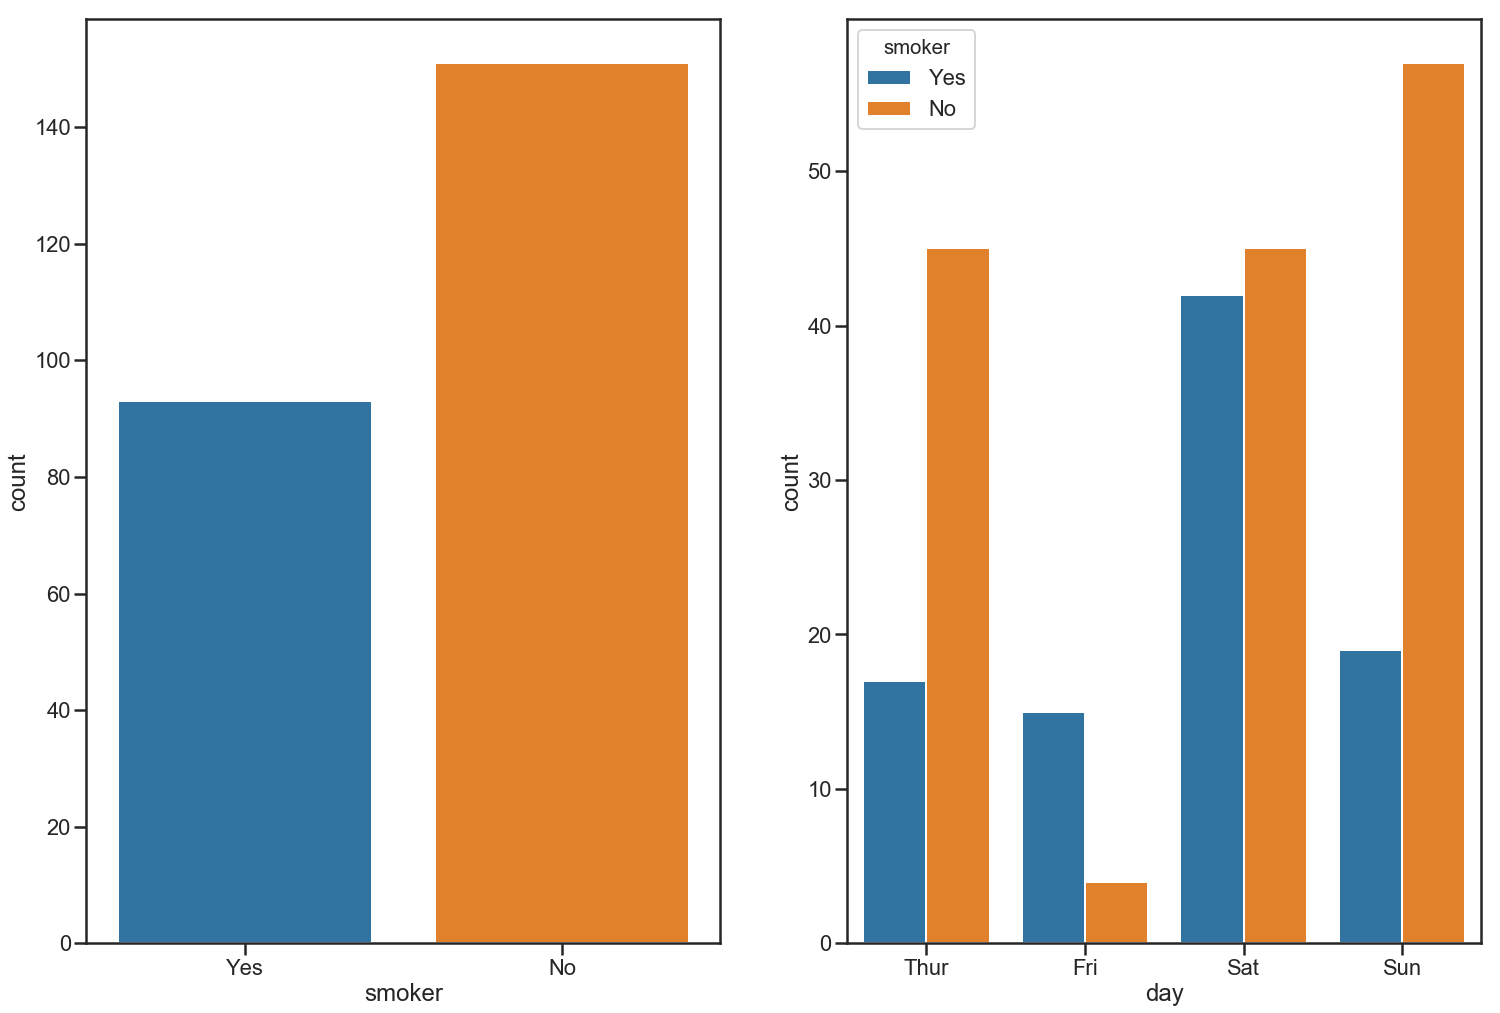

In [82]:
plt.subplot(1, 2, 1)
sns.countplot(x = "smoker", data = tips)
plt.subplot(1, 2, 2)
sns.countplot(x = "day", hue ="smoker", data = tips)
plt.show()

<i> In the first plot we can see that 93 people smoke and 151 people do not smoke. From this we can deduce that 62 % of people do not smoke. We can see in the second plot that there are more non-smokers to smokers over all of the days with Saturday being the only day where they are similar. </i>


### Regression of total_bill and tip amount for smokers/non-smokers

In [85]:
# Calculate slope and vertical intercept for the line 
# Adapted from: https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/linear-regression-derived.ipynb

smoker = tips [tips ['smoker'] == "Yes"]
nonsmoker = tips [tips ['smoker'] == "No"]

print("\n **********************************************************************")
print("                                Smoker                                ") 
print("**********************************************************************")

# Calculate the mean for the total bill and tip
smoker_x_avg = smoker["total_bill"].mean()
smoker_y_avg = smoker["tip"].mean()

# Subtract means from total bill and total tip
smoker_x_zero = smoker['total_bill'] - smoker_x_avg
smoker_y_zero = smoker['tip'] - smoker_y_avg

# Calaculate the slope of the line: 
m1 = np.sum(smoker_x_zero * smoker_y_zero) / np.sum(smoker_x_zero * smoker_x_zero)

# Calculate the Intercept of the line 
c1 = smoker_y_avg - m * smoker_x_avg

print("\n Slope of the line = %8.2f \n Vertical intercept of the line = %6.2f." % (m1, c1))

# Line of best fit
print(f" Best fit line: y = {m1 : 4.2f} x + {c1 : 5.3f}")

# Another way to calculate the slope and vertical intercept
# np.polyfit(smoker['total_bill'],smoker['tip'],1)


print("\n **********************************************************************")
print("                            Non Smoker                                ") 
print("**********************************************************************")

# Calculate the mean for the total bill and tip
nonsmoker_x_avg = nonsmoker["total_bill"].mean()
nonsmoker_y_avg = nonsmoker["tip"].mean()

# Subtract means from total bill and total tip
nonsmoker_x_zero = nonsmoker['total_bill'] - nonsmoker_x_avg
nonsmoker_y_zero = nonsmoker['tip'] - nonsmoker_y_avg

# Calaculate the slope of the line: 
m2 = np.sum(nonsmoker_x_zero * nonsmoker_y_zero) / np.sum(nonsmoker_x_zero * nonsmoker_x_zero)

# Calculate the Intercept of the line 
c2 = nonsmoker_y_avg - m2 * nonsmoker_x_avg

print("\n Slope of the line = %8.2f \n Vertical intercept of the line = %6.2f." % (m2, c2))

# Line of best fit
print(f" Best fit line: y = {m2 : 4.2f} x + {c2 : 5.3f}\n")
print("**********************************************************************")

# Another way to calculate the slope and vertical intercept
# np.polyfit(nonsmoker['total_bill'],nonsmoker['tip'],1)


 **********************************************************************
                                Smoker                                
**********************************************************************

 Slope of the line =     0.07 
 Vertical intercept of the line =   0.83.
 Best fit line: y =  0.07 x +  0.829

 **********************************************************************
                            Non Smoker                                
**********************************************************************

 Slope of the line =     0.14 
 Vertical intercept of the line =   0.36.
 Best fit line: y =  0.14 x +  0.360

**********************************************************************


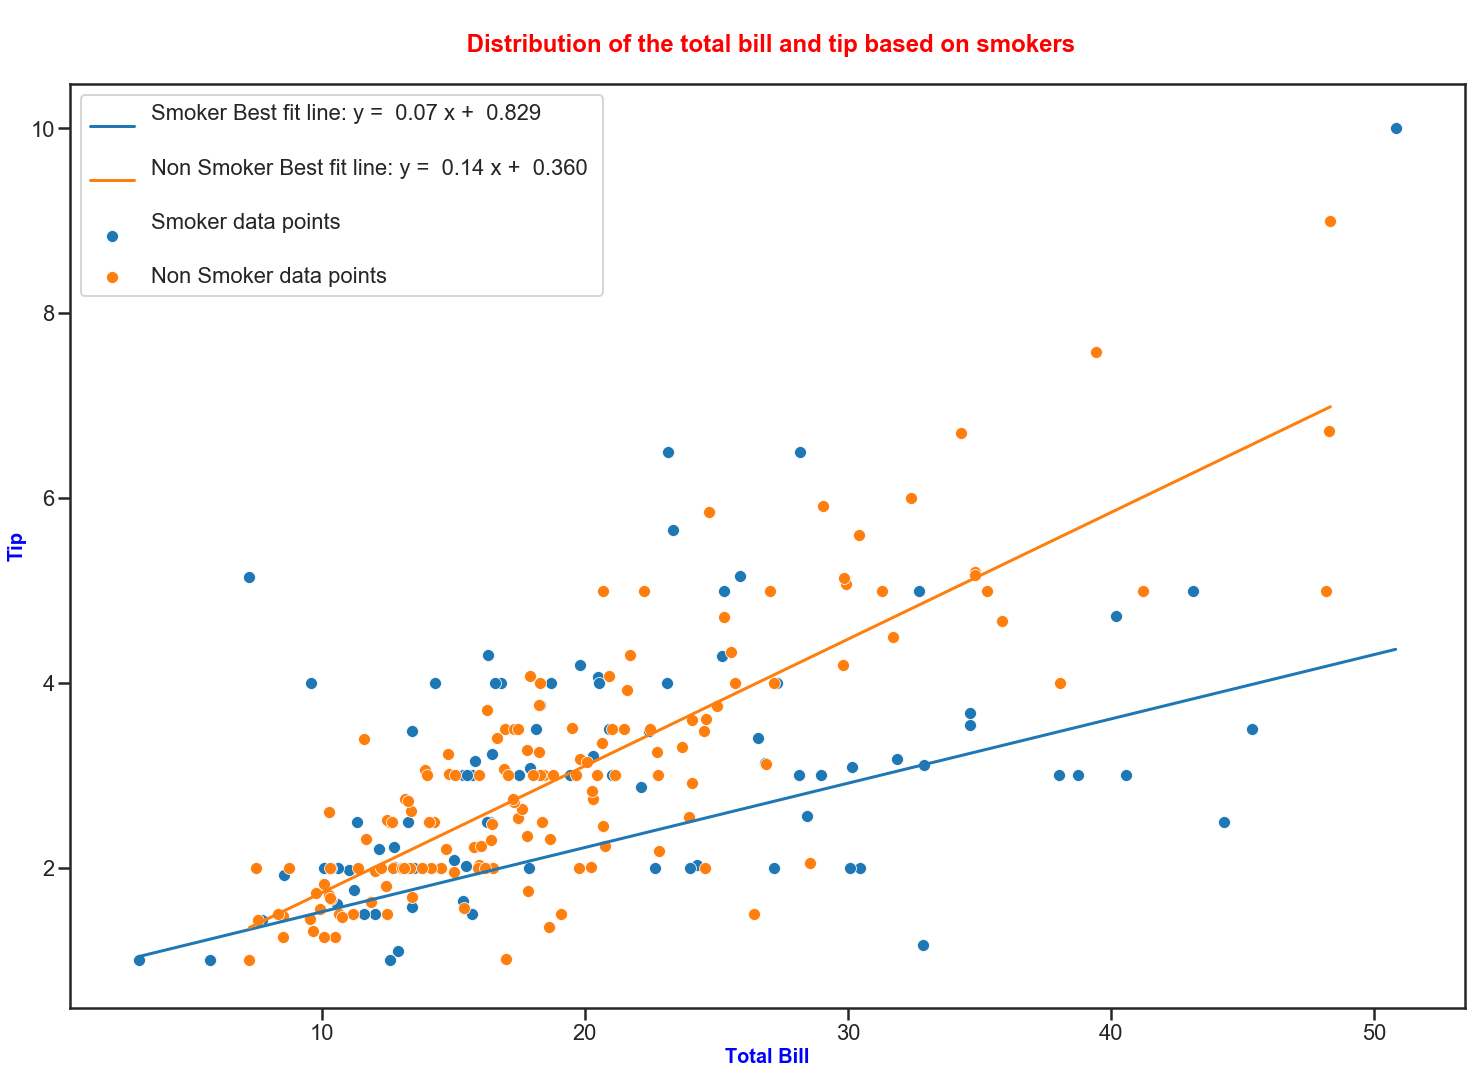

In [86]:

smoker.loc[:,'mx+c'] = smoker.loc[:,'total_bill'] * m1 + c1
nonsmoker.loc[:,'mx+c'] = nonsmoker.loc[:,'total_bill'] * m2 + c2
sns.lineplot(x="total_bill", y="mx+c", label="Smoker Best fit line: y =  0.07 x +  0.829 \n", data=smoker)
sns.scatterplot(x="total_bill", y="tip", label="Smoker data points \n", data=smoker)
sns.lineplot(x="total_bill", y="mx+c", label="Non Smoker Best fit line: y =  0.14 x +  0.360 \n", data=nonsmoker)
sns.scatterplot(x="total_bill", y="tip", label="Non Smoker data points", data=nonsmoker)
# Format of the plot
plt.xlabel("Total Bill", fontweight="bold", fontsize="20", color="b")                                       
plt.ylabel("Tip", fontweight="bold", fontsize="20", color="b")                                           
plt.title("\n Distribution of the total bill and tip based on smokers\n", fontweight="bold", fontsize="24", color="r")
plt.show()

<i> This plot shows the realtionship between total_bill and tip based on whether the individual was a smoker or non-smoker. The correlation between tip and bill seems to be much stronger in the nonsmoking section than in the smoking section due to the fact that  non-smoker data points are more clustered together proportional to the cost of the total bill. As we can see the smoker data points are scattered. One possibe reason as to why there is more variation in the smoker tipping rate may be simply down to the fact that some smokers may have less disposable income for tipping the waiter as they have an additional cost of cigarettes. </i>

<a name="gender"></a>
### DOES THE GENDER AFFECT THE AMOUNT TIPPED

In [87]:
# Numerical representation of the mean of the total bill and tip over the days
round(pd.pivot_table(tips, index=['sex'], values=['total_bill','tip','size'], aggfunc=['sum', 'mean'], margins=True, margins_name='Total', fill_value=0).T,2)

sex                 Male   Female    Total
sum  size         413.00   214.00   627.00
     tip          485.07   246.51   731.58
     total_bill  3256.82  1570.95  4827.77
mean size           2.63     2.46     2.57
     tip            3.09     2.83     3.00
     total_bill    20.74    18.06    19.79

<i> <b> Tips: </b> From the above table we can see that in total the females tipped $485.07 which represents 34% of the overall amount tipped to the waiter in that week. However this does not account for the fact that the group size for females account for 34% of the overall customers. The males obviously mke up the other portion. The mean tip provided by females was 52% which indicates slightly higher than their male counterparts again the females represented 52% of the average group size. 
 
    
<b> Total Bill:</b> From the above table we can see that the total bill paid by females accounted for 33% of the overall bill fro that week. This again is not a fair way of determing if the male or female is going to pay for the bullas stated earlier it does not account for the fact that 66% of the customers were males. Average total bill is a better way to deterine if males or females were on average more likely to pay the total bill and we see that females paid the bill 47% of the time and males paid the total bill on average 53% of the time. 

What I am trying to make clear that an understanding of the number of people entering the restaurant that are males and females impact the sum so the mean is a better indicator. 

In [88]:
female = tips [tips ['sex'] == "Female"]
male = tips [tips ['sex'] == "Male"]

print("\n **********************************************************************")
print("                                Male                                  ") 
print("**********************************************************************")

# Calculate the mean for the total bill and tip
male_x_avg = male["total_bill"].mean()
male_y_avg = male["tip"].mean()

# Subtract means from total bill and total tip
male_x_zero = male["total_bill"] - male_x_avg
male_y_zero = male["tip"] - male_y_avg

# Calaculate the slope of the line: 
m_male = np.sum(male_x_zero * male_y_zero) / np.sum(male_x_zero * male_x_zero)

# Calculate the Intercept of the line 
c_male = male_y_avg - m_male * male_x_avg
print("\n Slope of the line = %8.2f \n Vertical intercept of the line = %6.2f. \n" % (m_male, c_male))

# Line of best fit
print(f" Best fit line: y = {m_male : 4.2f} x + {c_male : 5.3f}")

# Another way to calculate the slope and vertical intercept
# np.polyfit(male['total_bill'],male['tip'],1)

print("\n **********************************************************************")
print("                               Female                                 ") 
print("**********************************************************************")
# Calculate the mean for the total bill and tip
female_x_avg = female["total_bill"].mean()
female_y_avg = female["tip"].mean()

# Subtract means from total bill and total tip
female_x_zero = female["total_bill"] - female_x_avg
female_y_zero = female["tip"] - female_y_avg

# Calaculate the slope of the line: 
m_female = np.sum(female_x_zero * female_y_zero) / np.sum(female_x_zero * female_x_zero)

# Calculate the Intercept of the line 
c_female = female_y_avg - m_female * female_x_avg

print("\n Slope of the line = %8.2f \n Vertical intercept of the line = %6.2f." % (m_female, c_female))

# Line of best fit
print(f"\n Best fit line: y = {m_female : 4.2f} x + {c_female : 5.3f}\n")
print("**********************************************************************")
# Another way to calculate the slope and vertical intercept
# np.polyfit(female['total_bill'],female['tip'],1)



 **********************************************************************
                                Male                                  
**********************************************************************

 Slope of the line =     0.11 
 Vertical intercept of the line =   0.85. 

 Best fit line: y =  0.11 x +  0.852

 **********************************************************************
                               Female                                 
**********************************************************************

 Slope of the line =     0.10 
 Vertical intercept of the line =   1.05.

 Best fit line: y =  0.10 x +  1.048

**********************************************************************


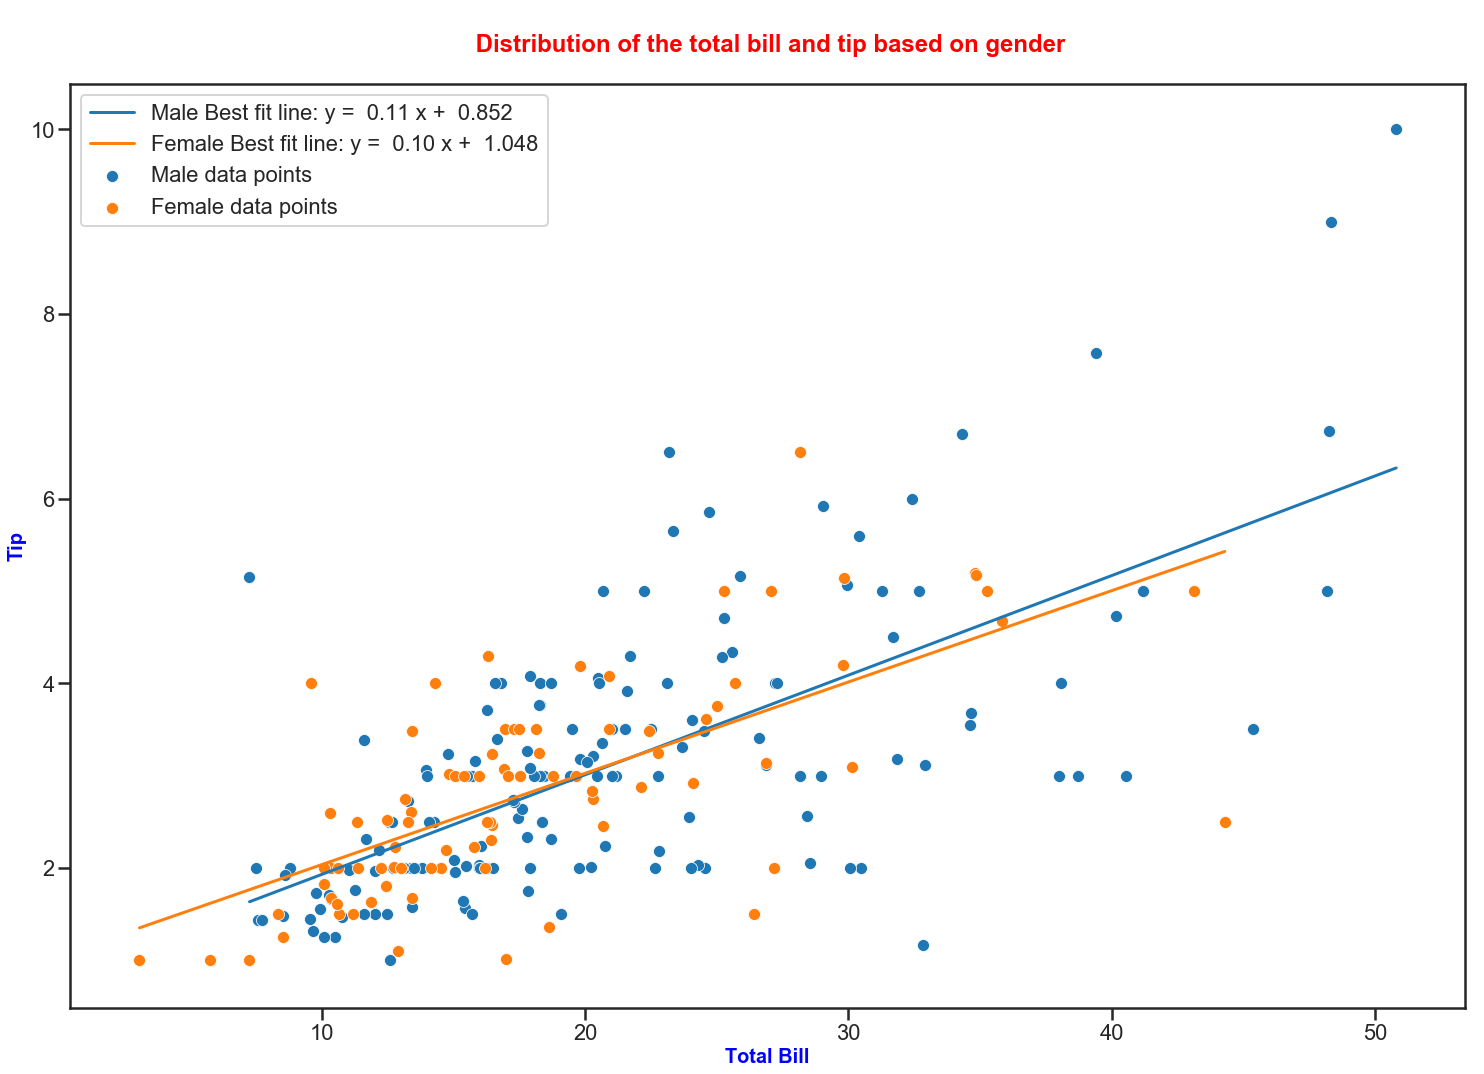

In [90]:

male.loc[:,'mx+c'] = male.loc[:,'total_bill'] * m_male + c_male
female.loc[:,'mx+c'] = female.loc[:,'total_bill'] * m_female + c_female
sns.lineplot(x="total_bill", y="mx+c", label="Male Best fit line: y =  0.11 x +  0.852", data=male)
sns.scatterplot(x="total_bill", y="tip", label="Male data points", data=male)
sns.lineplot(x="total_bill", y="mx+c", label="Female Best fit line: y =  0.10 x +  1.048", data=female)
sns.scatterplot(x="total_bill", y="tip", label="Female data points", data=female)
# Format of the plot
plt.xlabel("Total Bill", fontweight="bold", fontsize="20", color="b")                                       
plt.ylabel("Tip", fontweight="bold", fontsize="20", color="b")                                           
plt.title("\n Distribution of the total bill and tip based on gender\n", fontweight="bold", fontsize="24", color="r")
plt.show()

<i> From the plot above we can see that the slope is very similar for both males and females with a difference of 0.01. There appears to more outliers for males near the top left the further it is from the line. There seems to be a relationship between total_bill and tip based on gender. From this plot we can see that the majortiy of the points reside for tips in the range of 2 to 4 dollars when the total bill is in the region of 10 to 20 dollars </i>

<a name="sg"></a>
### Does the variables gender and smoker affect total bill and tip

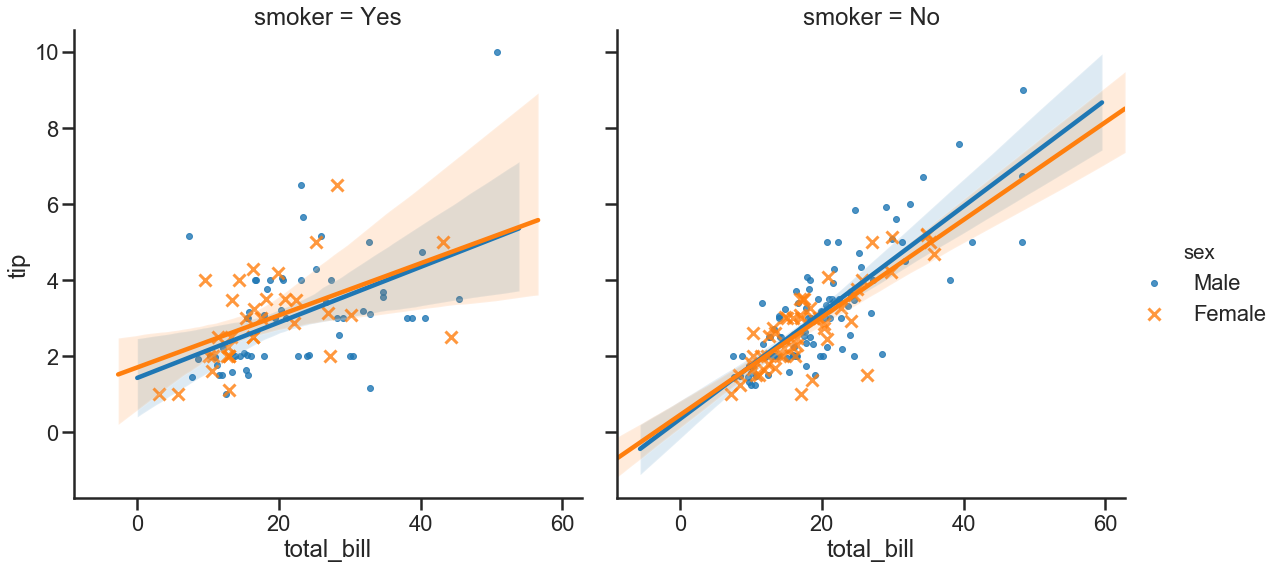

In [91]:
sns.lmplot(x="total_bill", y="tip", hue="sex", col="smoker", markers=[".", "x"], size=8, data=tips)

<i><b> Right plot: </b> From this plot we can see that for males and females that do  not smoke the tips are more clustered proportional to the total bill (more than the non-smokers). The fact the range is wider may reflect that some people who smoke may have less disposable income to tip waiters due to the cost of cigarettes.  particularly in the 20 dollars region of the total bill. Interestingly the highest tip seems to come from a smoking male which appears as an outlier of 10 dollars in the top left of the right plot.

<b> Left plot:</b> In contrast for the males and females that smoker seems to be  appear to be slightly more generous but not so consistent with their tipping habit as the data points are more spread out. Hence this would it more difficult to predict the tup based on total bill. Lowest overall tip appears to come from female non-smoker at under 2 dollars which is slightly higher than the lowest female smoker tip. </i>

<a name="con"></a>
## Conclusion

This project gave me a deeper understanding of how to critically analysis a dataset. It demonstrated that there are a number of different aspects on how to critically analyse a dataset in terms of descriptive statstics, graphs and linear regression. In this project I have aimed to combine all 3. Under each of the plots I have explaineed what the plot is telling us so to conclude I will do a quick summary on the dataset as a whole. 

 * There is a strong linear relationship between the amount of tip and the total bill for the entire dataset.
 
 * The total number of people served was 244 people with 87 females and 157 males.
 * Size: The groups that entered the restaurant ranged in size from 1 to 6 with 2 being the most popular group size for all 4 days. Interestinly Group Size of 2 accounted for ~80%  of total customers entering the restaurant on Thursday and Friday, 61% on Saturday and 51% on Sunday. It is also clear that larger group sizes were seen at the weekend. 
 
 * Day: The most tips were received on Saturday and the lowest tips were received by servers on Friday. Saturday tips account for ~ 36% of the waiter overall tip while Friday tips account for ~ 7% of their overall tips this is the sum which means it did not account for the fact that there was an extra sitting on Saturday and hence would involve more work. In looking at the mean tip for each of the days they were similar, again Saturday was 28% and for Friday 18% so if it was optional the waiter should try and work on Saturday.
 
  * Time: In terms of time there is no data for Lunch on Thursday or Friday in addition there is no information regarding Monday - Wednesday so I assume the restaurant was not open these days or times. The total bill and tip are obviously going to be higher for dinner as there are 2 more sittings than for lunch. 
  
  * Sex: In terms of sex it appears that males tend to pay more than the females particularly towards the weekend particularly when the party size is 2
  
  * Smoker: There was almost twice the male to female smokers. The highest tip was actually given by a male smoker on Saturday night. In order to accurately determine who tipped more I used the average tip for smokers which is 3.01 dollars and for non-smoker 2.99 dollars so essentially we could say there are fewer but slightly more generous smokers </i>


<a name="bib"></a>
 ## Bibliography:

1. Jain, Ranjeet. “seaborn_tips_dataset.” Kaggle, April 2, 2018. https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset.
2. Anon, Code Faster with Line-of-Code Completions, Cloudless Processing. Kite. Available at: https://kite.com/python/docs/seaborn.pointplot [Accessed November 29, 2019].
3. Ray, S. & Business Analytics, 2019. 7 Regression Types and Techniques in Data Science. Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/ [Accessed November 29, 2019].
4. Swaminathan, S., 2019. Linear Regression - Detailed View. Medium. Available at: https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86 [Accessed November 29, 2019].
5. Anon, Visualizing linear relationships¶. Visualizing linear relationships - seaborn 0.9.0 documentation. Available at: https://seaborn.pydata.org/tutorial/regression.html [Accessed November 29, 2019].
6. Anon, Visualizing linear relationships¶. Visualizing linear relationships - seaborn 0.9.0 documentation. Available at: https://seaborn.pydata.org/tutorial/regression.html [Accessed November 29, 2019].
7. Nerds, R., 2019. Data Visualization with Python and Seaborn - Part 4: LM Plot & Reg Plot. Medium. Available at: https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-4-9b0119887130 [Accessed November 29, 2019].
8. Teknomo, K., How K-Nearest Neighbor (KNN) Algorithm works? K Nearest Neighbors Tutorial: How K-Nearest Neighbor (KNN) Algorithm works? Available at: https://people.revoledu.com/kardi/tutorial/KNN/HowTo_KNN.html [Accessed November 29, 2019].
9. Stephanie, 2019. Mean Squared Error: Definition and Example. Statistics How To. Available at: https://www.statisticshowto.datasciencecentral.com/mean-squared-error/ [Accessed November 29, 2019].
10. Khan Academy. 2019. Scatterplots and correlation review (article) | Khan Academy. [ONLINE] Available at: https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/introduction-to-scatterplots/a/scatterplots-and-correlation-review.
11. Nishant Bhushan. 2019. Exploratory Data Analysis on Iris Dataset – DevMins – Medium. [ONLINE] Available at: https://medium.com/devmins/exploratory-data-analysis-on-iris-dataset-7da027acca02
12. Wells, R., 2019. Seaborn Barplot Tutorial for Python. wellsr.com. Available at: https://wellsr.com/python/seaborn-barplot-tutorial-for-python/ [Accessed November 29, 2019].